In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[03/30/25 20:15:10] INFO     Resolved project path as:                                              ]8;id=716797;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=239241;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/30/25 20:15:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=717923;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=17774;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=548768;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=221844;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=719432;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=838894;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=821094;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=315795;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

[03/30/25 20:15:12] INFO     Resolved project path as:                                              ]8;id=488328;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=636932;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/30/25 20:15:12] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=428291;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=399709;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=998928;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=219400;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=992418;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=540464;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=109088;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=112092;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## Cambio en el feature Selection

In [10]:
# ahora
a = catalog.load("feature_selected_list").set_index('Feature')
a

[03/25/25 20:12:14] INFO     Loading data from 'feature_selected_list' (ParquetDataSet)...      ]8;id=770413;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=957786;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Importance
Feature                                          
sum_saldo_activos                           265.0
periodo                                     264.0
num_prod_activos                            262.0
ah_sum_saldo_corte                          262.0
ah_sum_monto_trx_credito_mean_6             260.0
ah_sum_monto_trx_credito_mean_3             258.8
ah_sum_cantidad_trx_credito                 258.6
tc_sum_pagos_total_valor_std_6              256.4
nivel_educativo                             255.0
region3                                     253.2
ah_sum_cantidad_trx_debito                  251.6
tc_sum_cupo_disponible                      251.4
ah_sum_monto_trx_credito                    250.6
cdt_sum_monto_apertura                      247.2
fid_cant_prev                               247.0
fid_sum_encargo                             246.4
cdt_cant_prev                               245.4
tc_sum_cupo_disponible_mean_3               244.4
tc_sum_facturacion_total_cant               244.2
edad_anios                                  242.0
cdt_prom_plazo_total_meses                  240.0
departamento                                237.6
flujo_neto_ca_std_6                         236.8
num_activos_prev                            235.4
tc_sum_facturacion_total_valor_mean_6       232.2

In [11]:
# antes
b = pd.read_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/FID/04-feature/feature_selected_list_FID_prueba.parquet').set_index('Feature')
b

Importance
Feature                                   
fid_cant_prev                     0.327348
ah_sum_monto_trx_debito_std_6     0.118907
fid_cant                          0.104337
antiguedad_meses                  0.042819
estrato                           0.042796
ah_cant                           0.040028
viv_sum_saldo_promedio            0.021550
nivel_educativo                   0.020612
edad_anios                        0.019046
ah_cant_prev                      0.018640
ah_sum_monto_trx_debito_mean_6    0.015252
ah_sum_monto_trx_debito_std_3     0.015174
ah_sum_monto_trx_credito_std_6    0.014536
vlr_activos                       0.014147
viv_sum_saldo_corte               0.012157
ocupacion                         0.011639
tc_cant                           0.010827
viv_sum_cuota_pactada             0.007946
tc_sum_saldo_mean_2               0.007227
ord_cant                          0.006898
mar_status                        0.006101
region                            0.005275
ah_sum_monto_trx_debito           0.004675
delta_ah_sum_monto_trx_debito     0.004596
cc_sum_saldo_corte                0.003928

In [12]:
pd.concat([a,b], axis  =1)

Importance  Importance
Feature                                                      
sum_saldo_activos                           265.0         NaN
periodo                                     264.0         NaN
num_prod_activos                            262.0         NaN
ah_sum_saldo_corte                          262.0         NaN
ah_sum_monto_trx_credito_mean_6             260.0         NaN
ah_sum_monto_trx_credito_mean_3             258.8         NaN
ah_sum_cantidad_trx_credito                 258.6         NaN
tc_sum_pagos_total_valor_std_6              256.4         NaN
nivel_educativo                             255.0    0.020612
region3                                     253.2         NaN
ah_sum_cantidad_trx_debito                  251.6         NaN
tc_sum_cupo_disponible                      251.4         NaN
ah_sum_monto_trx_credito                    250.6         NaN
cdt_sum_monto_apertura                      247.2         NaN
fid_cant_prev                               247.0    0.327348
fid_sum_encargo                             246.4         NaN
cdt_cant_prev                               245.4         NaN
tc_sum_cupo_disponible_mean_3               244.4         NaN
tc_sum_facturacion_total_cant               244.2         NaN
edad_anios                                  242.0    0.019046
cdt_prom_plazo_total_meses                  240.0         NaN
departamento                                237.6         NaN
flujo_neto_ca_std_6                         236.8         NaN
num_activos_prev                            235.4         NaN
tc_sum_facturacion_total_valor_mean_6       232.2         NaN
ah_sum_monto_trx_debito_std_6                 NaN    0.118907
fid_cant                                      NaN    0.104337
antiguedad_meses                              NaN    0.042819
estrato                                       NaN    0.042796
ah_cant                                       NaN    0.040028
viv_sum_saldo_promedio                        NaN    0.021550
ah_cant_prev                                  NaN    0.018640
ah_sum_monto_trx_debito_mean_6                NaN    0.015252
ah_sum_monto_trx_debito_std_3                 NaN    0.015174
ah_sum_monto_trx_credito_std_6                NaN    0.014536
vlr_activos                                   NaN    0.014147
viv_sum_saldo_corte                           NaN    0.012157
ocupacion                                     NaN    0.011639
tc_cant                                       NaN    0.010827
viv_sum_cuota_pactada                         NaN    0.007946
tc_sum_saldo_mean_2                           NaN    0.007227
ord_cant                                      NaN    0.006898
mar_status                                    NaN    0.006101
region                                        NaN    0.005275
ah_sum_monto_trx_debito                       NaN    0.004675
delta_ah_sum_monto_trx_debito                 NaN    0.004596
cc_sum_saldo_corte                            NaN    0.003928

### models:

In [9]:
info_save_all = catalog.load('info_save_all')

                    INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=307930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=790701;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [8]:
#info_save_all_anterior = catalog.load('info_save_all_anterior')
info_save_all_anterior = pd.read_pickle('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/FID/06-models/info_save_all3.pickle')

[01/16/25 13:21:20] INFO     Loading data from 'info_save_all_anterior' (PickleDataSet)...      ]8;id=9596;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=983312;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [10]:
info_save_all['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name  \
8             Run0,MLP_0         test    f1-score  class metric        1.0   
6             Run0,MLP_0         test   precision  class metric        1.0   
79  Run8,random_forest_8         test      recall  class metric        1.0   
5             Run0,MLP_0        train    f1-score  class metric        1.0   
3             Run0,MLP_0        train   precision  class metric        1.0   
40        Run4,xgboost_4        train      recall  class metric        1.0   

       value  
8     0.7577  
6     0.3808  
79   98.8661  
5     0.8228  
3     0.4135  
40  100.0000

In [12]:
#info_save_all['all_results'][(info_save_all['all_results']['model_name'] == 'Run10,MLP_9') & (info_save_all['all_results']['metric_name'] == 'recall')]

In [13]:
info_save_all_anterior['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name  \
107  Run12,random_forest_11         test    f1-score  class metric          1   
105  Run12,random_forest_11         test   precision  class metric          1   
52     Run6,random_forest_5         test      recall  class metric          1   
104  Run12,random_forest_11        train    f1-score  class metric          1   
102  Run12,random_forest_11        train   precision  class metric          1   
49     Run6,random_forest_5        train      recall  class metric          1   

       value  
107  14.4847  
105   8.0414  
52   98.5319  
104  14.2894  
102   7.9304  
49   98.7948

In [23]:
#info_save_all_anterior['all_results'][(info_save_all_anterior['all_results']['model_name'] == 'Run10,MLP_9') & (info_save_all_anterior['all_results']['metric_name'] == 'recall')]

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [12]:
for i in range(12):
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [13]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX  \
llave                                                           
0                                        region3_no_relevante   
1                                           region3_santander   
2                                     region3_valle_del_cauca   
3                                      departamento_antioquia   
4                                         departamento_arauca   
5           departamento_archipielago_de_san_andres_provid...   
6                                      departamento_atlantico   
7                                    departamento_bogota_d_c_   
8                                        departamento_bolivar   
9                                         departamento_boyaca   
10                                        departamento_caldas   
11                                       departamento_caqueta   
12                                      departamento_casanare   
13                                         departamento_cauca   
14                                         departamento_cesar   
15                                         departamento_choco   
16                                       departamento_cordoba   
17                                  departamento_cundinamarca   
18                                       departamento_guainia   
19                                      departamento_guaviare   
20                                         departamento_huila   
21                                    departamento_la_guajira   
22                                     departamento_magdalena   
23                                          departamento_meta   
24                                        departamento_narino   
25                            departamento_norte_de_santander   
26                                      departamento_putumayo   
27                                       departamento_quindio   
28                                     departamento_risaralda   
29                                     departamento_santander   
30                                         departamento_sucre   
31                                        departamento_tolima   
32                               departamento_valle_del_cauca   
33                                        departamento_vaupes   
34                                       departamento_vichada   
DROP_FIRST                                                NaN   

                    region3                              departamento  
llave                                                                  
0              no_relevante                               bogota_d_c_  
1           valle_del_cauca                                 antioquia  
2                 santander                                   bolivar  
3                       NaN                           valle_del_cauca  
4                       NaN                                     huila  
5                       NaN                                 atlantico  
6                       NaN                              cundinamarca  
7                       NaN                                     cesar  
8                       NaN                                    boyaca  
9                       NaN                                     sucre  
10                      NaN                                     choco  
11                      NaN                                 magdalena  
12                      NaN                                    tolima  
13                      NaN                                 santander  
14                      NaN                                 risaralda  
15                      NaN                                     cauca  
16                      NaN                                   quindio  
17                      NaN                                    caldas  
18                      NaN                                    narino  
19                      NaN                                      meta  

In [13]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX    grupo_etario  \
llave                                                             
0                           grupo_etario__joven  _persona_mayor   
1                   grupo_etario__persona_mayor          _joven   
2                         ocupacion_comerciante             NaN   
3                         ocupacion_desempleado             NaN   
4                    ocupacion_empleado_entidad             NaN   
5                    ocupacion_empleado_privado             NaN   
6                    ocupacion_empleado_publico             NaN   
7                          ocupacion_estudiante             NaN   
8                   ocupacion_fuerzas_militares             NaN   
9                               ocupacion_hogar             NaN   
10                      ocupacion_independiente             NaN   
11                         ocupacion_pensionado             NaN   
12                   ocupacion_policia_nacional             NaN   
13                           ocupacion_politico             NaN   
14          ocupacion_profesional_independiente             NaN   
15                ocupacion_rentista_de_capital             NaN   
DROP_FIRST                                  NaN         _adulto   

                            ocupacion  
llave                                  
0                          estudiante  
1                    empleado_publico  
2                    empleado_privado  
3                          pensionado  
4                       independiente  
5                 rentista_de_capital  
6                         desempleado  
7           profesional_independiente  
8                    empleado_entidad  
9                               hogar  
10                  fuerzas_militares  
11                        comerciante  
12                   policia_nacional  
13                           politico  
14                                NaN  
15                                NaN  
DROP_FIRST                    artista

[03/28/25 16:12:07] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=267818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=145678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#855\855]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=864657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=469648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#859\859]8;;\
                             ['overall metric']                                                                    

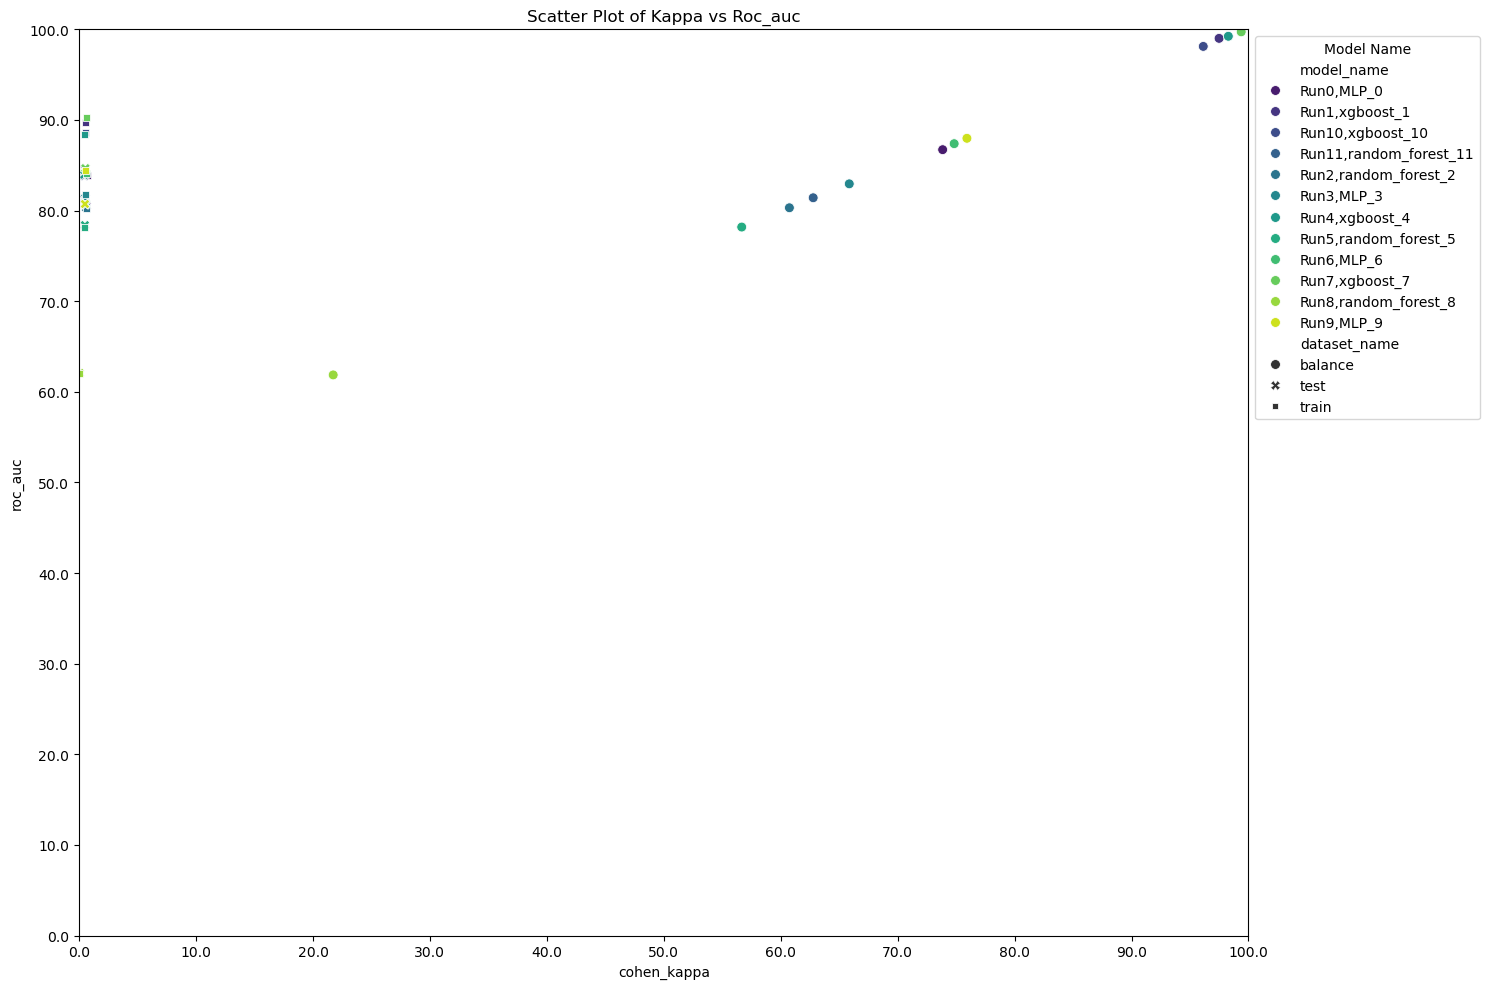

                    INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=894329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=520286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#883\883]8;;\
                             f1-score                                                                              

                    INFO     Algoritmos con Metricas = 0: ['Run0,MLP_0', 'Run1,xgboost_1',             ]8;id=656510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=761331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#890\890]8;;\
                             'Run2,random_forest_2', 'Run3,MLP_3', 'Run4,xgboost_4',                               
                             'Run5,random_forest_5', 'Run6,MLP_6', 'Run7,xgboost_7',                               
                             'Run8,random_forest_8', 'Run9,MLP_9', 'Run10,xgboost_10',                             
                             'Run11,random_forest_11']                                                             

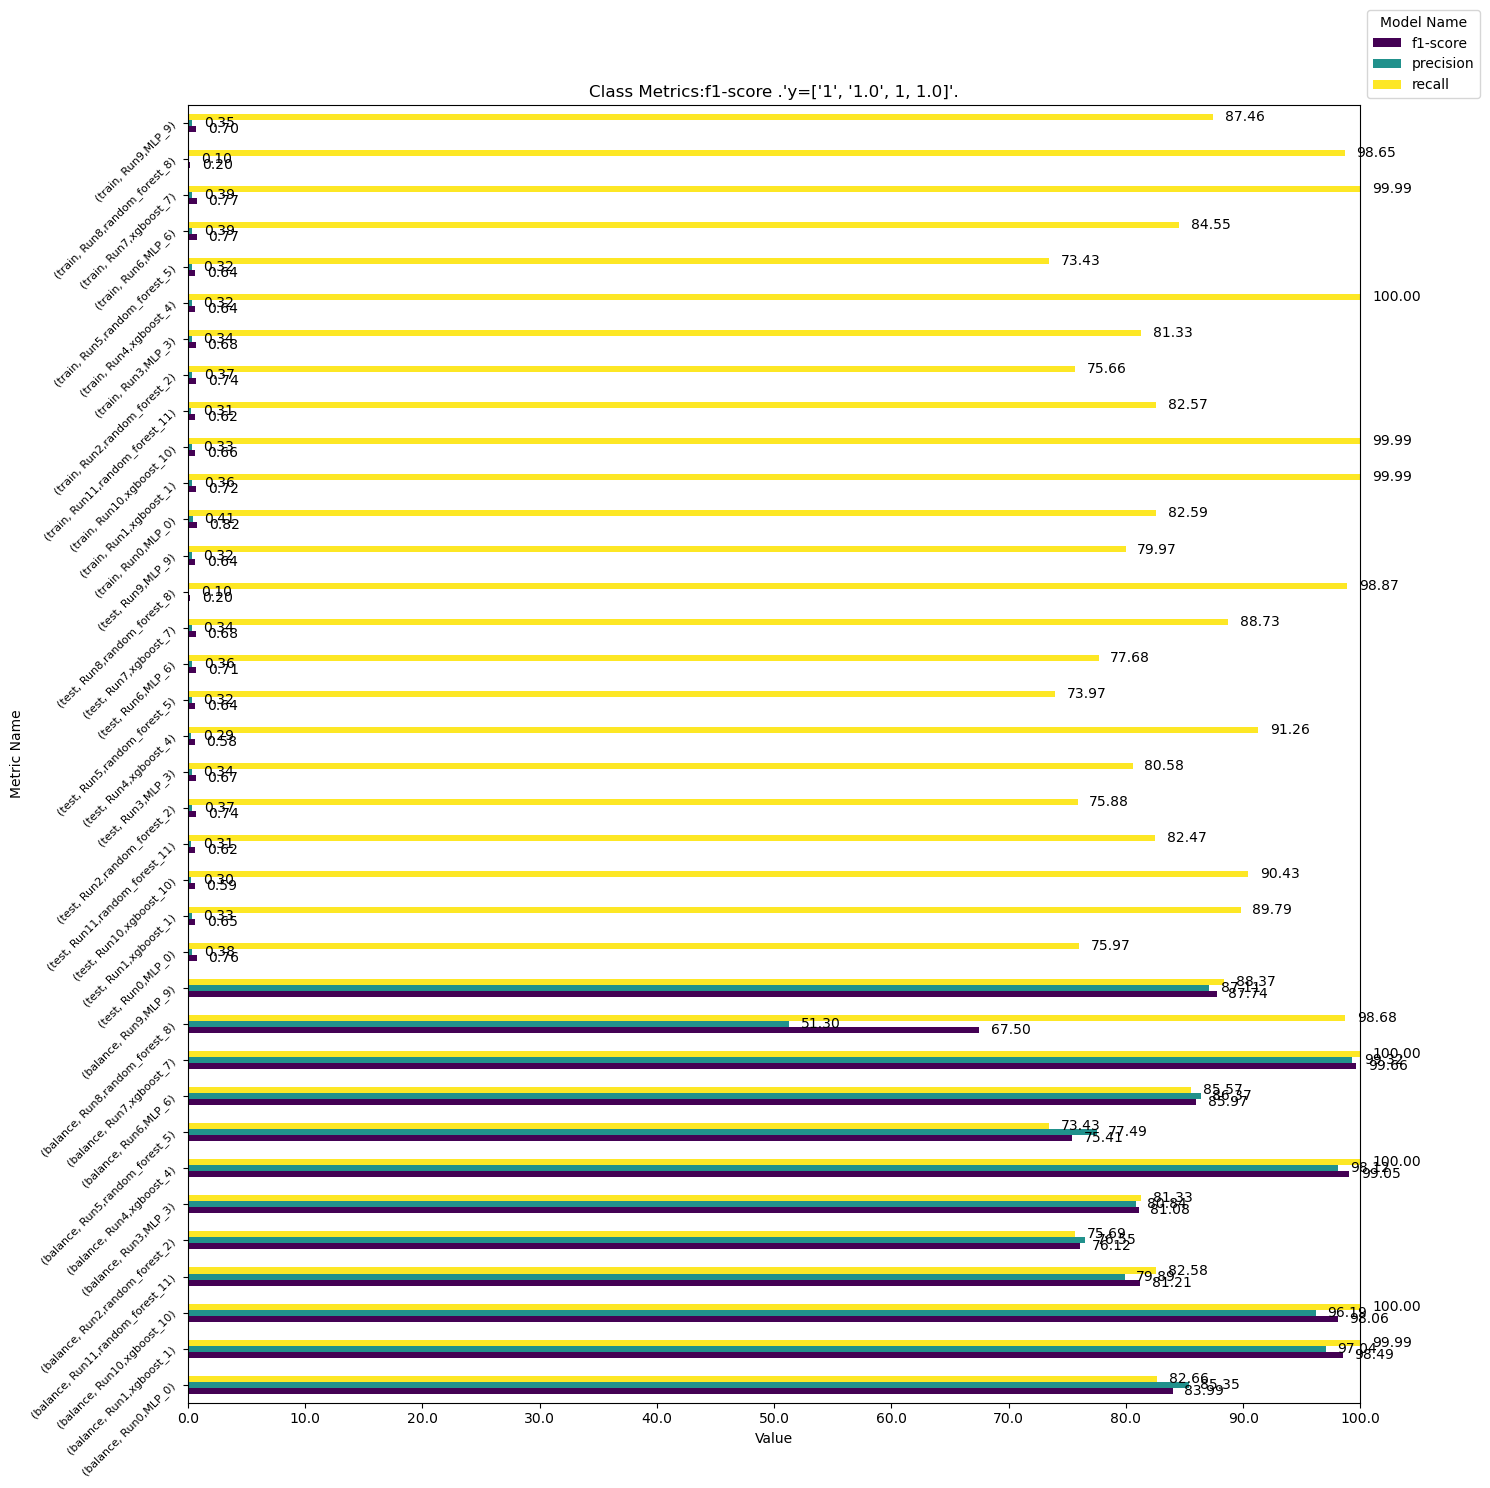

[03/28/25 16:12:08] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=492097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=461272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#924\924]8;;\

model_name dataset_name metric_name   metric_type class_name  \
8             Run0,MLP_0         test    f1-score  class metric        1.0   
6             Run0,MLP_0         test   precision  class metric        1.0   
79  Run8,random_forest_8         test      recall  class metric        1.0   
5             Run0,MLP_0        train    f1-score  class metric        1.0   
3             Run0,MLP_0        train   precision  class metric        1.0   
40        Run4,xgboost_4        train      recall  class metric        1.0   

       value  
8     0.7577  
6     0.3808  
79   98.8661  
5     0.8228  
3     0.4135  
40  100.0000

                    INFO     Mejores algoritmos:                                                       ]8;id=996984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=445195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#971\971]8;;\

best_model_name   best_unbiased_model    best_fitting_model
model_name       Run0,MLP_0  Run8,random_forest_8  Run8,random_forest_8
metric_name        f1-score              f1-score              f1-score
metric_type    class metric          class metric          class metric
class_name              1.0                   1.0                   1.0
test                 0.7577                 0.198                 0.198
balance             83.9858               67.5047               67.5047
train                0.8228                0.1977                0.1977
bias                -83.163               -67.307               -67.307
real_bias              True                  True                  True
test-train          -0.0651                0.0003                0.0003
fitting         overfitting          Underfitting          Underfitting

In [14]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [ ]:
# sin EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [16]:
# con EDA
pct = 0.59
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run0', 'Run1', 'Run2', 'Run3', 'Run6', 'Run7', 'Run9']
[1, 1, 1, 1, 1, 1, 1]
Total de modelo:  7


model_name dataset_name metric_name   metric_type class_name  \
16            Run0,MLP_0         test    f1-score  class metric        1.0   
16  Run2,random_forest_2         test    f1-score  class metric        1.0   
16            Run6,MLP_6         test    f1-score  class metric        1.0   
16        Run7,xgboost_7         test    f1-score  class metric        1.0   
16            Run3,MLP_3         test    f1-score  class metric        1.0   
16        Run1,xgboost_1         test    f1-score  class metric        1.0   
16            Run9,MLP_9         test    f1-score  class metric        1.0   

     value  
16  0.7577  
16  0.7412  
16  0.7097  
16  0.6815  
16  0.6745  
16  0.6477  
16  0.6430

model_name dataset_name metric_name   metric_type class_name  \
16            Run0,MLP_0        train    f1-score  class metric        1.0   
16            Run6,MLP_6        train    f1-score  class metric        1.0   
16        Run7,xgboost_7        train    f1-score  class metric        1.0   
16  Run2,random_forest_2        train    f1-score  class metric        1.0   
16        Run1,xgboost_1        train    f1-score  class metric        1.0   
16            Run9,MLP_9        train    f1-score  class metric        1.0   
16            Run3,MLP_3        train    f1-score  class metric        1.0   

     value  
16  0.8228  
16  0.7727  
16  0.7691  
16  0.7387  
16  0.7224  
16  0.7035  
16  0.6806

model_name dataset_name metric_name   metric_type class_name  \
8             Run0,MLP_0         test    f1-score  class metric        1.0   
6             Run0,MLP_0         test   precision  class metric        1.0   
79  Run8,random_forest_8         test      recall  class metric        1.0   
5             Run0,MLP_0        train    f1-score  class metric        1.0   
3             Run0,MLP_0        train   precision  class metric        1.0   
40        Run4,xgboost_4        train      recall  class metric        1.0   

       value  
8     0.7577  
6     0.3808  
79   98.8661  
5     0.8228  
3     0.4135  
40  100.0000

In [17]:
# sin EDA
pct = 0.58
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run3', 'Run4', 'Run6', 'Run7']
[1, 1, 1, 1, 1, 1]
Total de modelo:  6


model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2         test    f1-score  class metric        1.0   
16            Run1,MLP_0         test    f1-score  class metric        1.0   
16  Run6,random_forest_5         test    f1-score  class metric        1.0   
16            Run7,MLP_6         test    f1-score  class metric        1.0   
16            Run4,MLP_3         test    f1-score  class metric        1.0   
16        Run2,xgboost_1         test    f1-score  class metric        1.0   

     value  
16  2.4359  
16  2.1732  
16  2.0394  
16  1.9389  
16  1.8679  
16  1.8141

model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2        train    f1-score  class metric        1.0   
16            Run1,MLP_0        train    f1-score  class metric        1.0   
16  Run6,random_forest_5        train    f1-score  class metric        1.0   
16        Run2,xgboost_1        train    f1-score  class metric        1.0   
16            Run7,MLP_6        train    f1-score  class metric        1.0   
16            Run4,MLP_3        train    f1-score  class metric        1.0   

     value  
16  2.4408  
16  2.2018  
16  2.0629  
16  2.0519  
16  2.0020  
16  1.8865

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
79  Run9,random_forest_8         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
76  Run9,random_forest_8        train      recall  class metric        1.0   

      value  
26   2.4359  
24   1.2409  
79  99.9854  
23   2.4408  
21   1.2434  
76  99.9890

## model_selection

In [17]:
## algoritmo anterior

In [14]:
info_save_select_ini = catalog.load('info_save_select_anterior') # best model unico

[01/16/25 13:23:35] INFO     Loading data from 'info_save_select_anterior' (PickleDataSet)...   ]8;id=307503;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=586332;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [15]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df = check_df[check_df['class_name'].isin([1,1.0,'1','1.0'])]
check_df = check_df.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df

value  \
metric_name     dataset_name class_name select_model        name_model                         
Precision n_top test         1          best_fitting_model  Run6                     14.1217   
                                        best_model_name     Run12                     14.247   
                                        best_unbiased_model Run3                     14.3172   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]  14.4426   
                train        1          best_fitting_model  Run6                     14.0009   
                                        best_model_name     Run12                    14.0372   
                                        best_unbiased_model Run3                      14.155   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]  15.3343   
backtest        test         1          best_fitting_model  Run6                     14.1217   
                                        best_model_name     Run12                     14.247   
                                        best_unbiased_model Run3                     14.3172   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]  14.4426   
                train        1          best_fitting_model  Run6                     14.0009   
                                        best_model_name     Run12                    14.0372   
                                        best_unbiased_model Run3                      14.155   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]  15.3343   
f1-score n_top  test         1          best_fitting_model  Run6                     24.7485   
                                        best_model_name     Run12                    24.9408   
                                        best_unbiased_model Run3                     25.0482   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]  25.2398   
                train        1          best_fitting_model  Run6                     24.5628   
                                        best_model_name     Run12                    24.6187   
                                        best_unbiased_model Run3                     24.7996   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]   26.591   
recall n_top    test         1          best_fitting_model  Run6                       100.0   
                                        best_model_name     Run12                      100.0   
                                        best_unbiased_model Run3                       100.0   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]    100.0   
                train        1          best_fitting_model  Run6                       100.0   
                                        best_model_name     Run12                      100.0   
                                        best_unbiased_model Run3                       100.0   
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]    100.0   

                                                                                           model_name  
metric_name     dataset_name class_name select_model        name_model                                 
Precision n_top test         1          best_fitting_model  Run6                      random_forest_5  
                                        best_model_name     Run12                    random_forest_11  
                                        best_unbiased_model Run3                      random_forest_2  
                                        modelo_produccion   [3, 4, 6, 7, 9, 10, 11]          Ensamble  
                train        1          best_fitting_model  Run6                      random_forest_5  
                                        best_model_name     Run12                    random_fo

In [17]:
params['Ensamble']['want'] = True
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [18]:
params['n_obs_filter']

1

In [19]:
params['n_obs_filter_select']

0.3

In [20]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [21]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run0', 'Run1', 'Run2', 'Run3', 'Run6', 'Run7', 'Run9'],
    'weights': [1, 1, 1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

[03/28/25 16:12:37] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=639747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#632\632]8;;\

                    INFO     Preprocesamiento de datos equivalente en todos los modelos                ]8;id=563103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=421342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#601\601]8;;\

                    INFO     Finalizacion de estructura del ensamblado                                 ]8;id=688506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=948245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#604\604]8;;\

                    INFO     Incorporando el KS en el modelo de produccion                             ]8;id=255405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=905335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#112\112]8;;\

                    INFO     TOP N: 6778183.                                                           ]8;id=34284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=26872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#123\123]8;;\

                    INFO     Nodo : 0. Data: train                                                     ]8;id=990028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:13:04] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=938183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=114284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=674878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=147228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=585076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=589700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=347006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=546045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=560017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=414460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 1. Data: train                                                     ]8;id=831225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=948819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:13:23] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=367941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=567452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

[03/28/25 16:13:24] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=458125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=914511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88]                ]8;id=243348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=262989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=4761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=806216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=704468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=591103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 2. Data: train                                                     ]8;id=139686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=415511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    7.7s remaining:    2.7s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    9.3s finished


[03/28/25 16:13:39] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=715286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=318143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

[03/28/25 16:13:40] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=923454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=606338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=606828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=30231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76]                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=567104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=779563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 3. Data: train                                                     ]8;id=527167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=82962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:13:52] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=746590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=234461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=529107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=22048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=897826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=616492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77]                                                       

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=154468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=384095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

[03/28/25 16:13:53] INFO     Finalizando el procesamiento del ks                                       ]8;id=222290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 4. Data: train                                                     ]8;id=866453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=32315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:14:20] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=34786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=559686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=190985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=735046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=271685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=360745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=298137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=797109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=739334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 5. Data: train                                                     ]8;id=377172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=778098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:14:44] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=110905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=32162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=565991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=730793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89]                    ]8;id=816193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=540097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=381007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=686264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=28361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 6. Data: train                                                     ]8;id=782106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:15:11] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=743832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=517387;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

[03/28/25 16:15:12] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=310179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=978634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=655201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=22950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=560046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=339101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=901392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=387281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=735655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=852375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#413\413]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=468193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_0,Run0. Weight: 1                                             ]8;id=850193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:15:38] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=662270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:15:42] INFO     Update probs: Selected: 237845, Target Select: 6778183, Diff %:           ]8;id=106612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=254595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9649102126631872                                                                   

[03/28/25 16:15:47] INFO     Update probs: Selected: 475988, Target Select: 6778183, Diff %:           ]8;id=84745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=15580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297764607417651                                                                   

[03/28/25 16:15:51] INFO     Update probs: Selected: 713481, Target Select: 6778183, Diff %:           ]8;id=9287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947386047263699                                                                   

[03/28/25 16:15:55] INFO     Update probs: Selected: 951354, Target Select: 6778183, Diff %:           ]8;id=571448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=661610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596446864889897                                                                   

[03/28/25 16:15:59] INFO     Update probs: Selected: 1189004, Target Select: 6778183, Diff %:          ]8;id=819899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=325976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.824583667923985                                                                    

[03/28/25 16:16:04] INFO     Update probs: Selected: 1427051, Target Select: 6778183, Diff %:          ]8;id=524430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=224859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894640790902223                                                                   

[03/28/25 16:16:08] INFO     Update probs: Selected: 1664820, Target Select: 6778183, Diff %:          ]8;id=540444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=149366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543855041978064                                                                   

[03/28/25 16:16:12] INFO     Update probs: Selected: 1902471, Target Select: 6778183, Diff %:          ]8;id=128595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193243381006384                                                                   

[03/28/25 16:16:16] INFO     Update probs: Selected: 2140206, Target Select: 6778183, Diff %:          ]8;id=657470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=703531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842507793017686                                                                   

[03/28/25 16:16:21] INFO     Update probs: Selected: 2378115, Target Select: 6778183, Diff %:          ]8;id=348706;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=873573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491515499065162                                                                   

[03/28/25 16:16:25] INFO     Update probs: Selected: 2616051, Target Select: 6778183, Diff %:          ]8;id=6029;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140483371428597                                                                   

[03/28/25 16:16:29] INFO     Update probs: Selected: 2854132, Target Select: 6778183, Diff %:          ]8;id=978938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=337010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789237322155509                                                                   

[03/28/25 16:16:33] INFO     Update probs: Selected: 3092011, Target Select: 6778183, Diff %:          ]8;id=288485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=129368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438289287851922                                                                   

[03/28/25 16:16:38] INFO     Update probs: Selected: 3329559, Target Select: 6778183, Diff %:          ]8;id=535587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=94946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087829585008253                                                                   

[03/28/25 16:16:42] INFO     Update probs: Selected: 3805194, Target Select: 6778183, Diff %:          ]8;id=482886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4386114980961712                                                                   

[03/28/25 16:16:46] INFO     Update probs: Selected: 4042912, Target Select: 6778183, Diff %:          ]8;id=65106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40354044734407435                                                                  

[03/28/25 16:16:51] INFO     Update probs: Selected: 4280611, Target Select: 6778183, Diff %:          ]8;id=822099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36847219970307676                                                                  

[03/28/25 16:16:55] INFO     Update probs: Selected: 4756666, Target Select: 6778183, Diff %:          ]8;id=979213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29823877578991304                                                                  

[03/28/25 16:16:59] INFO     Update probs: Selected: 4994815, Target Select: 6778183, Diff %:          ]8;id=278122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2631041386755123                                                                   

[03/28/25 16:17:03] INFO     Update probs: Selected: 5232236, Target Select: 6778183, Diff %:          ]8;id=922264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=383273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22807690497586153                                                                  

[03/28/25 16:17:08] INFO     Update probs: Selected: 5470527, Target Select: 6778183, Diff %:          ]8;id=328065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19292131829429804                                                                  

[03/28/25 16:17:12] INFO     Update probs: Selected: 6183664, Target Select: 6778183, Diff %:          ]8;id=474905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=689713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08771067408478053                                                                  

[03/28/25 16:17:16] INFO     Update probs: Selected: 6659731, Target Select: 6778183, Diff %:          ]8;id=79009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.017475479785659373                                                                 

[03/28/25 16:17:21] INFO     Update probs: Selected: 6778183, Target Select: 6778183, Diff %: 0.0      ]8;id=364887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=855683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=238556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=35158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_1,Run1. Weight: 1                                         ]8;id=153788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=10318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:17:39] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=535593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=171438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:17:43] INFO     Update probs: Selected: 239416, Target Select: 6778183, Diff %:           ]8;id=969457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9646784396349287                                                                   

[03/28/25 16:17:47] INFO     Update probs: Selected: 475201, Target Select: 6778183, Diff %:           ]8;id=718163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.929892568554139                                                                    

[03/28/25 16:17:51] INFO     Update probs: Selected: 713162, Target Select: 6778183, Diff %:           ]8;id=195508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=920329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947856674864045                                                                   

[03/28/25 16:17:55] INFO     Update probs: Selected: 951633, Target Select: 6778183, Diff %:           ]8;id=284502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596035250154798                                                                   

[03/28/25 16:18:00] INFO     Update probs: Selected: 1188707, Target Select: 6778183, Diff %:          ]8;id=802657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=84406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.824627484976431                                                                    

[03/28/25 16:18:04] INFO     Update probs: Selected: 1426713, Target Select: 6778183, Diff %:          ]8;id=673295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=864252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7895139449613562                                                                   

[03/28/25 16:18:08] INFO     Update probs: Selected: 1664920, Target Select: 6778183, Diff %:          ]8;id=304125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543707509814946                                                                   

[03/28/25 16:18:12] INFO     Update probs: Selected: 1902771, Target Select: 6778183, Diff %:          ]8;id=251451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=123303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.719280078451703                                                                    

[03/28/25 16:18:16] INFO     Update probs: Selected: 2140729, Target Select: 6778183, Diff %:          ]8;id=382021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6841736199804579                                                                   

[03/28/25 16:18:21] INFO     Update probs: Selected: 2378093, Target Select: 6778183, Diff %:          ]8;id=689041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491547956141048                                                                   

[03/28/25 16:18:25] INFO     Update probs: Selected: 2616070, Target Select: 6778183, Diff %:          ]8;id=945616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140455340317604                                                                   

[03/28/25 16:18:29] INFO     Update probs: Selected: 3091674, Target Select: 6778183, Diff %:          ]8;id=946143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=769519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438786471241629                                                                   

[03/28/25 16:18:31] INFO     ------------------------------------------------------                    ]8;id=7375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=79845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: random_forest_2,Run2. Weight: 1                                   ]8;id=511368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=712970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    7.6s remaining:    2.7s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    9.3s finished


[03/28/25 16:18:45] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=254993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=105470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:18:49] INFO     Update probs: Selected: 237711, Target Select: 6778183, Diff %:           ]8;id=971148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=611276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.964929981973045                                                                    

[03/28/25 16:18:54] INFO     Update probs: Selected: 475533, Target Select: 6778183, Diff %:           ]8;id=384040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=77297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298435878759839                                                                   

[03/28/25 16:18:58] INFO     Update probs: Selected: 713319, Target Select: 6778183, Diff %:           ]8;id=672344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.894762504936795                                                                    

[03/28/25 16:19:03] INFO     Update probs: Selected: 951789, Target Select: 6778183, Diff %:           ]8;id=814916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8595805099980334                                                                   

[03/28/25 16:19:07] INFO     Update probs: Selected: 1189167, Target Select: 6778183, Diff %:          ]8;id=204327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245596201813967                                                                   

[03/28/25 16:19:11] INFO     Update probs: Selected: 1427509, Target Select: 6778183, Diff %:          ]8;id=560470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=581829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7893965093595142                                                                   

[03/28/25 16:19:16] INFO     Update probs: Selected: 1665290, Target Select: 6778183, Diff %:          ]8;id=741033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=801819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543161640811409                                                                   

[03/28/25 16:19:20] INFO     Update probs: Selected: 1903005, Target Select: 6778183, Diff %:          ]8;id=109499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=571770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192455559255334                                                                   

[03/28/25 16:19:25] INFO     Update probs: Selected: 2140013, Target Select: 6778183, Diff %:          ]8;id=451908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=741953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842792530092504                                                                   

[03/28/25 16:19:29] INFO     Update probs: Selected: 2378894, Target Select: 6778183, Diff %:          ]8;id=143958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6490366223514473                                                                   

[03/28/25 16:19:33] INFO     Update probs: Selected: 2615988, Target Select: 6778183, Diff %:          ]8;id=278846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140576316691361                                                                   

[03/28/25 16:19:38] INFO     Update probs: Selected: 2853935, Target Select: 6778183, Diff %:          ]8;id=396955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789527960516853                                                                   

[03/28/25 16:19:42] INFO     Update probs: Selected: 3329129, Target Select: 6778183, Diff %:          ]8;id=439126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=313149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088463973309661                                                                   

[03/28/25 16:19:47] INFO     Update probs: Selected: 3567078, Target Select: 6778183, Diff %:          ]8;id=422035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=152160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47374126664918903                                                                  

[03/28/25 16:19:51] INFO     Update probs: Selected: 3806010, Target Select: 6778183, Diff %:          ]8;id=988106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=704342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4384911118510669                                                                   

[03/28/25 16:19:55] INFO     Update probs: Selected: 4043321, Target Select: 6778183, Diff %:          ]8;id=268451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=690484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034801066893591                                                                   

[03/28/25 16:20:00] INFO     Update probs: Selected: 4519478, Target Select: 6778183, Diff %:          ]8;id=380651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=795924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3332316344955573                                                                   

[03/28/25 16:20:04] INFO     Update probs: Selected: 4756136, Target Select: 6778183, Diff %:          ]8;id=822963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=54717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2983169678363656                                                                   

[03/28/25 16:20:09] INFO     Update probs: Selected: 4995024, Target Select: 6778183, Diff %:          ]8;id=771464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26307330445342064                                                                  

[03/28/25 16:20:13] INFO     Update probs: Selected: 5707764, Target Select: 6778183, Diff %:          ]8;id=261230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=392087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.157921230512661                                                                    

[03/28/25 16:20:18] INFO     Update probs: Selected: 5945100, Target Select: 6778183, Diff %:          ]8;id=742414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=904692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.12290653704687525                                                                  

[03/28/25 16:20:22] INFO     Update probs: Selected: 6422304, Target Select: 6778183, Diff %:          ]8;id=404607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=275311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.052503598678288854                                                                 

[03/28/25 16:20:26] INFO     Update probs: Selected: 6778183, Target Select: 6778183, Diff %: 0.0      ]8;id=895390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=581530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:20:27] INFO     ------------------------------------------------------                    ]8;id=627143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=115359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_3,Run3. Weight: 1                                             ]8;id=622271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:20:38] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=751908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=856687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:20:42] INFO     Update probs: Selected: 238106, Target Select: 6778183, Diff %:           ]8;id=372516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648717067686133                                                                   

[03/28/25 16:20:47] INFO     Update probs: Selected: 475562, Target Select: 6778183, Diff %:           ]8;id=485616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=34035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298393094432534                                                                   

[03/28/25 16:20:51] INFO     Update probs: Selected: 713596, Target Select: 6778183, Diff %:           ]8;id=639425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=399016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947216385276113                                                                   

[03/28/25 16:20:55] INFO     Update probs: Selected: 951583, Target Select: 6778183, Diff %:           ]8;id=28703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=383123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596109016236357                                                                   

[03/28/25 16:20:59] INFO     Update probs: Selected: 1188954, Target Select: 6778183, Diff %:          ]8;id=552220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245910445321408                                                                   

[03/28/25 16:21:04] INFO     Update probs: Selected: 1427054, Target Select: 6778183, Diff %:          ]8;id=724436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894636364937329                                                                   

[03/28/25 16:21:08] INFO     Update probs: Selected: 1664789, Target Select: 6778183, Diff %:          ]8;id=662864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=273444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543900776948631                                                                   

[03/28/25 16:21:12] INFO     Update probs: Selected: 1902564, Target Select: 6778183, Diff %:          ]8;id=862263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=523081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193106176094685                                                                   

[03/28/25 16:21:16] INFO     Update probs: Selected: 2140671, Target Select: 6778183, Diff %:          ]8;id=878216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271275;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6841821768459188                                                                   

[03/28/25 16:21:21] INFO     Update probs: Selected: 2378220, Target Select: 6778183, Diff %:          ]8;id=965286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=932956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491360590293889                                                                   

[03/28/25 16:21:25] INFO     Update probs: Selected: 2853794, Target Select: 6778183, Diff %:          ]8;id=498093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789735980866849                                                                   

[03/28/25 16:21:29] INFO     Update probs: Selected: 3091555, Target Select: 6778183, Diff %:          ]8;id=960146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.543896203451574                                                                    

[03/28/25 16:21:34] INFO     Update probs: Selected: 3567701, Target Select: 6778183, Diff %:          ]8;id=586608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4736493541115665                                                                   

[03/28/25 16:21:38] INFO     Update probs: Selected: 4043580, Target Select: 6778183, Diff %:          ]8;id=104834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=950420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034418958591115                                                                   

[03/28/25 16:21:42] INFO     Update probs: Selected: 4282262, Target Select: 6778183, Diff %:          ]8;id=337432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3682286241017689                                                                   

[03/28/25 16:21:46] INFO     Update probs: Selected: 4519028, Target Select: 6778183, Diff %:          ]8;id=144826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=158597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3332980239689604                                                                   

[03/28/25 16:21:51] INFO     Update probs: Selected: 4757135, Target Select: 6778183, Diff %:          ]8;id=701741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29816958320541065                                                                  

[03/28/25 16:21:55] INFO     Update probs: Selected: 4995557, Target Select: 6778183, Diff %:          ]8;id=573578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=453858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2629946698104787                                                                   

[03/28/25 16:21:59] INFO     Update probs: Selected: 5233170, Target Select: 6778183, Diff %:          ]8;id=574131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22793910993550925                                                                  

[03/28/25 16:22:04] INFO     Update probs: Selected: 5471508, Target Select: 6778183, Diff %:          ]8;id=133830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=630849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19277658924227922                                                                  

[03/28/25 16:22:08] INFO     Update probs: Selected: 5708078, Target Select: 6778183, Diff %:          ]8;id=88237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=533787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15787490541344193                                                                  

[03/28/25 16:22:12] INFO     Update probs: Selected: 6184186, Target Select: 6778183, Diff %:          ]8;id=143473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=279826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08763366229563292                                                                  

[03/28/25 16:22:16] INFO     Update probs: Selected: 6421808, Target Select: 6778183, Diff %:          ]8;id=484226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=343098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05257677463119541                                                                  

[03/28/25 16:22:21] INFO     Update probs: Selected: 6778183, Target Select: 6778183, Diff %: 0.0      ]8;id=912625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=936734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=558031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:22:22] INFO     ------------------------------------------------------                    ]8;id=188996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_6,Run6. Weight: 1                                             ]8;id=780992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=110824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:22:48] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=973773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=580446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:22:52] INFO     Update probs: Selected: 238551, Target Select: 6778183, Diff %:           ]8;id=612554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648060549560258                                                                   

[03/28/25 16:22:56] INFO     Update probs: Selected: 475600, Target Select: 6778183, Diff %:           ]8;id=491509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=198975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.929833703221055                                                                    

[03/28/25 16:23:01] INFO     Update probs: Selected: 713566, Target Select: 6778183, Diff %:           ]8;id=378297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=876592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947260644925048                                                                   

[03/28/25 16:23:05] INFO     Update probs: Selected: 951348, Target Select: 6778183, Diff %:           ]8;id=909381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=341220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596455716819684                                                                   

[03/28/25 16:23:09] INFO     Update probs: Selected: 1189301, Target Select: 6778183, Diff %:          ]8;id=989491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245398508715389                                                                   

[03/28/25 16:23:14] INFO     Update probs: Selected: 1427102, Target Select: 6778183, Diff %:          ]8;id=318502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894565549499032                                                                   

[03/28/25 16:23:18] INFO     Update probs: Selected: 1664597, Target Select: 6778183, Diff %:          ]8;id=118279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7544184038701818                                                                   

[03/28/25 16:23:22] INFO     Update probs: Selected: 1902831, Target Select: 6778183, Diff %:          ]8;id=867734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.719271226521916                                                                    

[03/28/25 16:23:26] INFO     Update probs: Selected: 2140321, Target Select: 6778183, Diff %:          ]8;id=367520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=697376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.68423381310301                                                                     

[03/28/25 16:23:31] INFO     Update probs: Selected: 2378054, Target Select: 6778183, Diff %:          ]8;id=649253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491605493684665                                                                   

[03/28/25 16:23:35] INFO     Update probs: Selected: 2615878, Target Select: 6778183, Diff %:          ]8;id=689285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140738602070791                                                                   

[03/28/25 16:23:39] INFO     Update probs: Selected: 2854082, Target Select: 6778183, Diff %:          ]8;id=447420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789311088237069                                                                   

[03/28/25 16:23:43] INFO     Update probs: Selected: 3329334, Target Select: 6778183, Diff %:          ]8;id=697878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=899292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088161532375269                                                                   

[03/28/25 16:23:48] INFO     Update probs: Selected: 3567305, Target Select: 6778183, Diff %:          ]8;id=103716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47370777684816123                                                                  

[03/28/25 16:23:52] INFO     Update probs: Selected: 3804440, Target Select: 6778183, Diff %:          ]8;id=658083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=428308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4387227373471622                                                                   

[03/28/25 16:23:56] INFO     Update probs: Selected: 4043267, Target Select: 6778183, Diff %:          ]8;id=107758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40348807342616744                                                                  

[03/28/25 16:24:00] INFO     Update probs: Selected: 4280940, Target Select: 6778183, Diff %:          ]8;id=805924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36842366162141094                                                                  

[03/28/25 16:24:05] INFO     Update probs: Selected: 4756202, Target Select: 6778183, Diff %:          ]8;id=540501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=688454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29830723071359977                                                                  

[03/28/25 16:24:09] INFO     Update probs: Selected: 4994249, Target Select: 6778183, Diff %:          ]8;id=227262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2631876418798371                                                                   

[03/28/25 16:24:13] INFO     Update probs: Selected: 5231573, Target Select: 6778183, Diff %:          ]8;id=263427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=375570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22817471880000878                                                                  

[03/28/25 16:24:18] INFO     Update probs: Selected: 5707366, Target Select: 6778183, Diff %:          ]8;id=388220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15797994831358197                                                                  

[03/28/25 16:24:22] INFO     Update probs: Selected: 6421460, Target Select: 6778183, Diff %:          ]8;id=285616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=189379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05262811582396049                                                                  

[03/28/25 16:24:26] INFO     Update probs: Selected: 6657765, Target Select: 6778183, Diff %:          ]8;id=302549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.01776552801834946                                                                  

[03/28/25 16:24:31] INFO     Update probs: Selected: 6778183, Target Select: 6778183, Diff %: 0.0      ]8;id=378716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=523484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=897608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:24:32] INFO     ------------------------------------------------------                    ]8;id=20202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=766227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_7,Run7. Weight: 1                                         ]8;id=918468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=820818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:24:54] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=860104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:24:58] INFO     Update probs: Selected: 234668, Target Select: 6778183, Diff %:           ]8;id=525507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=468262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9653789223454132                                                                   

[03/28/25 16:25:02] INFO     Update probs: Selected: 476158, Target Select: 6778183, Diff %:           ]8;id=167110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297513802740351                                                                   

[03/28/25 16:25:07] INFO     Update probs: Selected: 714643, Target Select: 6778183, Diff %:           ]8;id=218000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8945671723528267                                                                   

[03/28/25 16:25:11] INFO     Update probs: Selected: 950535, Target Select: 6778183, Diff %:           ]8;id=252055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=944262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8597655153305834                                                                   

[03/28/25 16:25:15] INFO     Update probs: Selected: 1188730, Target Select: 6778183, Diff %:          ]8;id=632280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8246240917366793                                                                   

[03/28/25 16:25:19] INFO     Update probs: Selected: 1426527, Target Select: 6778183, Diff %:          ]8;id=464489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=740685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7895413859436962                                                                   

[03/28/25 16:25:23] INFO     Update probs: Selected: 1664923, Target Select: 6778183, Diff %:          ]8;id=42763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543703083850053                                                                   

[03/28/25 16:25:28] INFO     Update probs: Selected: 1902815, Target Select: 6778183, Diff %:          ]8;id=17154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192735870365259                                                                   

[03/28/25 16:25:32] INFO     Update probs: Selected: 2140440, Target Select: 6778183, Diff %:          ]8;id=648271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.684216256775599                                                                    

[03/28/25 16:25:36] INFO     Update probs: Selected: 2616286, Target Select: 6778183, Diff %:          ]8;id=746259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.614013667084527                                                                    

[03/28/25 16:25:40] INFO     ------------------------------------------------------                    ]8;id=14557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_9,Run9. Weight: 1                                             ]8;id=222219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:26:05] INFO     Update probs: Selected: 0, Target Select: 6778183, Diff %: -1.0           ]8;id=542048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=590738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:26:10] INFO     Update probs: Selected: 237306, Target Select: 6778183, Diff %:           ]8;id=691251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9649897324991078                                                                   

[03/28/25 16:26:14] INFO     Update probs: Selected: 475556, Target Select: 6778183, Diff %:           ]8;id=213473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=76877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298401946362321                                                                   

[03/28/25 16:26:18] INFO     Update probs: Selected: 713254, Target Select: 6778183, Diff %:           ]8;id=571466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=599563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947720945273977                                                                   

[03/28/25 16:26:22] INFO     Update probs: Selected: 951380, Target Select: 6778183, Diff %:           ]8;id=248505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596408506527486                                                                   

[03/28/25 16:26:27] INFO     Update probs: Selected: 1189359, Target Select: 6778183, Diff %:          ]8;id=126021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=67511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.824531294006078                                                                    

[03/28/25 16:26:31] INFO     Update probs: Selected: 1427316, Target Select: 6778183, Diff %:          ]8;id=137983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=124486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894249830669959                                                                   

[03/28/25 16:26:35] INFO     Update probs: Selected: 1665162, Target Select: 6778183, Diff %:          ]8;id=405549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.75433504819802                                                                     

[03/28/25 16:26:40] INFO     Update probs: Selected: 1902811, Target Select: 6778183, Diff %:          ]8;id=681260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=57077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192741771651784                                                                   

[03/28/25 16:26:44] INFO     Update probs: Selected: 2140294, Target Select: 6778183, Diff %:          ]8;id=666193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842377964714143                                                                   

[03/28/25 16:26:48] INFO     Update probs: Selected: 2378405, Target Select: 6778183, Diff %:          ]8;id=218796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.649108765579212                                                                    

[03/28/25 16:26:52] INFO     Update probs: Selected: 2616361, Target Select: 6778183, Diff %:          ]8;id=243742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=544321;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140026021722931                                                                   

[03/28/25 16:26:57] INFO     Update probs: Selected: 2854220, Target Select: 6778183, Diff %:          ]8;id=203957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789107493851966                                                                   

[03/28/25 16:27:01] INFO     Update probs: Selected: 3091944, Target Select: 6778183, Diff %:          ]8;id=65638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=859727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438388134401211                                                                   

[03/28/25 16:27:05] INFO     Update probs: Selected: 3329536, Target Select: 6778183, Diff %:          ]8;id=930236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=119671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087863517405771                                                                   

[03/28/25 16:27:09] INFO     Update probs: Selected: 3805543, Target Select: 6778183, Diff %:          ]8;id=264490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=905595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.438560009371243                                                                    

[03/28/25 16:27:14] INFO     Update probs: Selected: 4043244, Target Select: 6778183, Diff %:          ]8;id=170355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=297837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034914666659192                                                                   

[03/28/25 16:27:18] INFO     Update probs: Selected: 4280927, Target Select: 6778183, Diff %:          ]8;id=45503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3684255795395315                                                                   

[03/28/25 16:27:22] INFO     Update probs: Selected: 4518817, Target Select: 6778183, Diff %:          ]8;id=621411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3333291532553783                                                                   

[03/28/25 16:27:27] INFO     Update probs: Selected: 4994799, Target Select: 6778183, Diff %:          ]8;id=366525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2631064991901222                                                                   

[03/28/25 16:27:31] INFO     Update probs: Selected: 5232890, Target Select: 6778183, Diff %:          ]8;id=889324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=189465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22798041894118232                                                                  

[03/28/25 16:27:35] INFO     Update probs: Selected: 5708508, Target Select: 6778183, Diff %:          ]8;id=974347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=534845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15781146658330117                                                                  

[03/28/25 16:27:39] INFO     Update probs: Selected: 6184578, Target Select: 6778183, Diff %:          ]8;id=320629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08757582968769063                                                                  

[03/28/25 16:27:44] INFO     Update probs: Selected: 6659759, Target Select: 6778183, Diff %:          ]8;id=928080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=171755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.017471348885092067                                                                 

[03/28/25 16:27:48] INFO     Update probs: Selected: 6778183, Target Select: 6778183, Diff %: 0.0      ]8;id=476859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=861687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=688828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=294579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:27:50] INFO     Iniciando sistema de votaciones..                                         ]8;id=631079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=352996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#449\449]8;;\

[03/28/25 16:27:56] INFO     Ok Sistema de votaciones                                                  ]8;id=896020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=580249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#468\468]8;;\

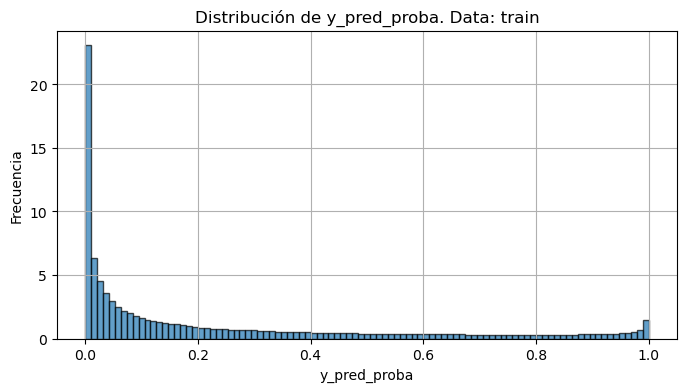

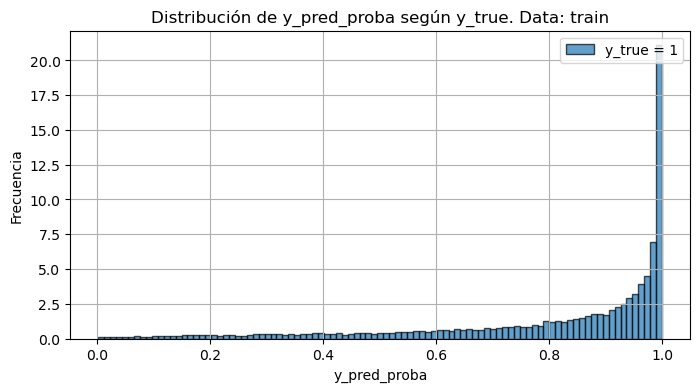

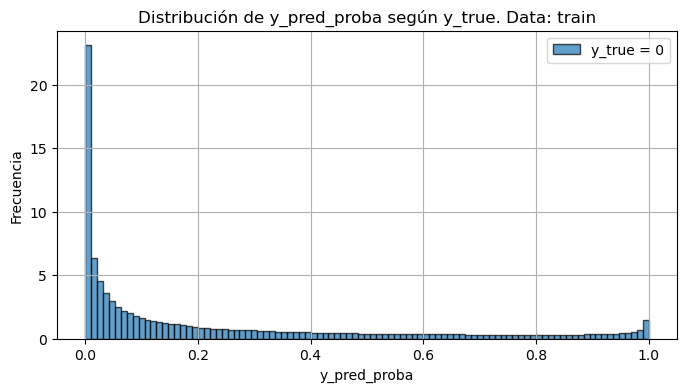

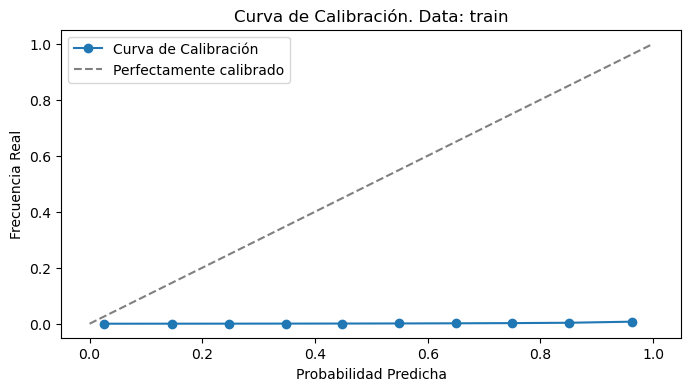

[03/28/25 16:28:10] INFO     TOP N: 1694545.                                                           ]8;id=849004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=600796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#123\123]8;;\

                    INFO     Nodo : 0. Data: test                                                      ]8;id=946687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=44645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:17] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=500922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=908921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=130059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=793900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=696615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=872398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 75]                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=743706;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

[03/28/25 16:28:18] INFO     Finalizando el procesamiento del ks                                       ]8;id=746871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=226420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 1. Data: test                                                      ]8;id=901056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:22] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=46474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=412755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=971209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=477203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=492670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=539408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 79]                                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=705192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

[03/28/25 16:28:23] INFO     Finalizando el procesamiento del ks                                       ]8;id=381630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 2. Data: test                                                      ]8;id=287757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    2.5s finished


[03/28/25 16:28:27] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=332699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=42278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=485235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=696885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=244549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=581393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 76, 74]                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=825017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=394654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=385142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 3. Data: test                                                      ]8;id=351852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=45491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:30] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=639658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=267700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=93237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=475522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=598920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=692694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=121700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=936953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=477291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 4. Data: test                                                      ]8;id=868342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:37] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=239354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=263208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=135243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=802903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=687682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=380076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 76, 75, 74, 73]                                           

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=7440;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=682254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=984636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=279614;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 5. Data: test                                                      ]8;id=847150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=98049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:43] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=23807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=474356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=433346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=732784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=855019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=336703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 80, 78]                                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=529015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=872908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=794286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 6. Data: test                                                      ]8;id=91396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/28/25 16:28:50] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=780201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=353159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#887\887]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=290499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=455472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#925\925]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=569369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=658979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#949\949]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75]                                               

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=302020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=806332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=255734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=79059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#413\413]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=216508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_0,Run0. Weight: 1                                             ]8;id=573173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:28:57] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=665674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:28:58] INFO     Update probs: Selected: 59528, Target Select: 1694545, Diff %:            ]8;id=427631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648708060275767                                                                   

[03/28/25 16:28:59] INFO     Update probs: Selected: 118900, Target Select: 1694545, Diff %:           ]8;id=268857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298336721656846                                                                   

[03/28/25 16:29:00] INFO     Update probs: Selected: 178404, Target Select: 1694545, Diff %:           ]8;id=805966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=219201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947186412871891                                                                   

[03/28/25 16:29:01] INFO     Update probs: Selected: 237831, Target Select: 1694545, Diff %:           ]8;id=124420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596490503350457                                                                   

[03/28/25 16:29:02] INFO     Update probs: Selected: 297280, Target Select: 1694545, Diff %:           ]8;id=780569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245664765468016                                                                   

[03/28/25 16:29:03] INFO     Update probs: Selected: 356741, Target Select: 1694545, Diff %:           ]8;id=315279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=881975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894768212115937                                                                   

[03/28/25 16:29:04] INFO     Update probs: Selected: 416182, Target Select: 1694545, Diff %:           ]8;id=154904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543989684546589                                                                   

[03/28/25 16:29:05] INFO     Update probs: Selected: 475682, Target Select: 1694545, Diff %:           ]8;id=958820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192862980918182                                                                   

[03/28/25 16:29:06] INFO     Update probs: Selected: 535098, Target Select: 1694545, Diff %:           ]8;id=47157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.684223198557725                                                                    

[03/28/25 16:29:07] INFO     Update probs: Selected: 594522, Target Select: 1694545, Diff %:           ]8;id=182458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=54469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491553779923224                                                                   

[03/28/25 16:29:08] INFO     Update probs: Selected: 653966, Target Select: 1694545, Diff %:           ]8;id=885547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140757548486467                                                                   

[03/28/25 16:29:09] INFO     Update probs: Selected: 713530, Target Select: 1694545, Diff %:           ]8;id=480532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=672420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789253162353316                                                                   

[03/28/25 16:29:10] INFO     Update probs: Selected: 772954, Target Select: 1694545, Diff %:           ]8;id=810269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=904885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438574956699291                                                                   

[03/28/25 16:29:11] INFO     Update probs: Selected: 832353, Target Select: 1694545, Diff %:           ]8;id=598079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088044283273682                                                                   

[03/28/25 16:29:12] INFO     Update probs: Selected: 891784, Target Select: 1694545, Diff %:           ]8;id=55731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47373247685957                                                                     

[03/28/25 16:29:13] INFO     Update probs: Selected: 951398, Target Select: 1694545, Diff %:           ]8;id=931487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=717593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.43855253180057185                                                                  

                    INFO     Update probs: Selected: 1010761, Target Select: 1694545, Diff %:          ]8;id=534340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=642603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40352070909890264                                                                  

[03/28/25 16:29:14] INFO     Update probs: Selected: 1070313, Target Select: 1694545, Diff %:          ]8;id=479049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3683773520325515                                                                   

[03/28/25 16:29:15] INFO     Update probs: Selected: 1129651, Target Select: 1694545, Diff %:          ]8;id=302107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=661743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.33336028255372385                                                                  

[03/28/25 16:29:16] INFO     Update probs: Selected: 1189287, Target Select: 1694545, Diff %:          ]8;id=307429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29816735465862515                                                                  

[03/28/25 16:29:17] INFO     Update probs: Selected: 1248701, Target Select: 1694545, Diff %:          ]8;id=318087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26310543538235925                                                                  

[03/28/25 16:29:18] INFO     Update probs: Selected: 1367434, Target Select: 1694545, Diff %:          ]8;id=598147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=964326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1930376590766253                                                                   

[03/28/25 16:29:19] INFO     Update probs: Selected: 1426974, Target Select: 1694545, Diff %:          ]8;id=59575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15790138355723807                                                                  

[03/28/25 16:29:20] INFO     Update probs: Selected: 1545816, Target Select: 1694545, Diff %:          ]8;id=657594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=998348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08776928319991502                                                                  

[03/28/25 16:29:21] INFO     Update probs: Selected: 1664798, Target Select: 1694545, Diff %:          ]8;id=117422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=173840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.017554564794679397                                                                 

[03/28/25 16:29:22] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=538212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=671995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=575562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=12065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=511861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_1,Run1. Weight: 1                                         ]8;id=579677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=648588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:29:27] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=25578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:29:28] INFO     Update probs: Selected: 59344, Target Select: 1694545, Diff %:            ]8;id=976023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=509574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9649793897476904                                                                   

[03/28/25 16:29:29] INFO     Update probs: Selected: 119058, Target Select: 1694545, Diff %:           ]8;id=312227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297404317973261                                                                   

[03/28/25 16:29:30] INFO     Update probs: Selected: 178346, Target Select: 1694545, Diff %:           ]8;id=810770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=138897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947528687641816                                                                   

[03/28/25 16:29:31] INFO     Update probs: Selected: 237780, Target Select: 1694545, Diff %:           ]8;id=52595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=88136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596791469096424                                                                   

[03/28/25 16:29:32] INFO     Update probs: Selected: 297112, Target Select: 1694545, Diff %:           ]8;id=957408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8246656182042967                                                                   

                    INFO     Update probs: Selected: 356712, Target Select: 1694545, Diff %:           ]8;id=260226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894939349500898                                                                   

[03/28/25 16:29:33] INFO     Update probs: Selected: 416149, Target Select: 1694545, Diff %:           ]8;id=866474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=822836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7544184427088098                                                                   

[03/28/25 16:29:34] INFO     Update probs: Selected: 475748, Target Select: 1694545, Diff %:           ]8;id=366835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=907054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192473495835165                                                                   

[03/28/25 16:29:35] INFO     Update probs: Selected: 535100, Target Select: 1694545, Diff %:           ]8;id=615172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=851323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842220182998976                                                                   

[03/28/25 16:29:36] INFO     Update probs: Selected: 594659, Target Select: 1694545, Diff %:           ]8;id=731071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=964913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6490745303311508                                                                   

[03/28/25 16:29:37] INFO     Update probs: Selected: 653981, Target Select: 1694545, Diff %:           ]8;id=838687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=142474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140669029149418                                                                   

[03/28/25 16:29:38] INFO     Update probs: Selected: 713564, Target Select: 1694545, Diff %:           ]8;id=34610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=573531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789052518522672                                                                   

[03/28/25 16:29:39] INFO     Update probs: Selected: 773029, Target Select: 1694545, Diff %:           ]8;id=186438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438132360014045                                                                   

[03/28/25 16:29:40] INFO     Update probs: Selected: 832395, Target Select: 1694545, Diff %:           ]8;id=276622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=213446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087796429129944                                                                   

[03/28/25 16:29:41] INFO     Update probs: Selected: 891902, Target Select: 1694545, Diff %:           ]8;id=568076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47366284164775796                                                                  

[03/28/25 16:29:42] INFO     Update probs: Selected: 951269, Target Select: 1694545, Diff %:           ]8;id=904229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=209823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.43862865843043414                                                                  

[03/28/25 16:29:43] INFO     Update probs: Selected: 1010814, Target Select: 1694545, Diff %:          ]8;id=267516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034894322664786                                                                   

[03/28/25 16:29:44] INFO     Update probs: Selected: 1070166, Target Select: 1694545, Diff %:          ]8;id=509739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=818890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3684641009828597                                                                   

[03/28/25 16:29:45] INFO     Update probs: Selected: 1189183, Target Select: 1694545, Diff %:          ]8;id=450087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=98509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29822872806564593                                                                  

[03/28/25 16:29:46] INFO     Update probs: Selected: 1308076, Target Select: 1694545, Diff %:          ]8;id=430422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=217383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22806653113372616                                                                  

[03/28/25 16:29:47] INFO     Update probs: Selected: 1367553, Target Select: 1694545, Diff %:          ]8;id=375842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236751;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1929674337358996                                                                   

[03/28/25 16:29:48] INFO     Update probs: Selected: 1486484, Target Select: 1694545, Diff %:          ]8;id=664242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1227828119052607                                                                   

[03/28/25 16:29:49] INFO     Update probs: Selected: 1545990, Target Select: 1694545, Diff %:          ]8;id=491999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08766660076893798                                                                  

[03/28/25 16:29:50] INFO     Update probs: Selected: 1605461, Target Select: 1694545, Diff %:          ]8;id=820254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05257104414459338                                                                  

                    INFO     Update probs: Selected: 1664995, Target Select: 1694545, Diff %:          ]8;id=148710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.017438309398688144                                                                 

[03/28/25 16:29:51] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=657477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=701861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=125119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:29:52] INFO     ------------------------------------------------------                    ]8;id=798225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: random_forest_2,Run2. Weight: 1                                   ]8;id=475855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    2.5s finished


[03/28/25 16:29:55] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=603339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=911731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:29:56] INFO     Update probs: Selected: 59498, Target Select: 1694545, Diff %:            ]8;id=576346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648885098949865                                                                   

[03/28/25 16:29:57] INFO     Update probs: Selected: 118874, Target Select: 1694545, Diff %:           ]8;id=767791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298490155174398                                                                   

[03/28/25 16:29:58] INFO     Update probs: Selected: 178411, Target Select: 1694545, Diff %:           ]8;id=539023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=613350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947145103847935                                                                   

[03/28/25 16:29:59] INFO     Update probs: Selected: 237774, Target Select: 1694545, Diff %:           ]8;id=376569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=217112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596826876831244                                                                   

[03/28/25 16:30:00] INFO     Update probs: Selected: 297401, Target Select: 1694545, Diff %:           ]8;id=114441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=383521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8244950709482487                                                                   

[03/28/25 16:30:01] INFO     Update probs: Selected: 356682, Target Select: 1694545, Diff %:           ]8;id=225664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=213203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7895116388174996                                                                   

[03/28/25 16:30:02] INFO     Update probs: Selected: 416310, Target Select: 1694545, Diff %:           ]8;id=994038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=74883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543234319537103                                                                   

[03/28/25 16:30:03] INFO     Update probs: Selected: 475659, Target Select: 1694545, Diff %:           ]8;id=760987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=606972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192998710568324                                                                   

[03/28/25 16:30:04] INFO     Update probs: Selected: 535048, Target Select: 1694545, Diff %:           ]8;id=918386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.684252705003408                                                                    

[03/28/25 16:30:05] INFO     Update probs: Selected: 594442, Target Select: 1694545, Diff %:           ]8;id=6568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6492025883054153                                                                   

[03/28/25 16:30:06] INFO     Update probs: Selected: 654193, Target Select: 1694545, Diff %:           ]8;id=648053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6139417955852456                                                                   

[03/28/25 16:30:07] INFO     Update probs: Selected: 713439, Target Select: 1694545, Diff %:           ]8;id=365478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789790179664748                                                                   

[03/28/25 16:30:08] INFO     Update probs: Selected: 772935, Target Select: 1694545, Diff %:           ]8;id=383195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438687081192887                                                                   

[03/28/25 16:30:09] INFO     Update probs: Selected: 891944, Target Select: 1694545, Diff %:           ]8;id=458680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4736380562333842                                                                   

[03/28/25 16:30:10] INFO     Update probs: Selected: 951373, Target Select: 1694545, Diff %:           ]8;id=353304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.43856728502341336                                                                  

[03/28/25 16:30:11] INFO     Update probs: Selected: 1010671, Target Select: 1694545, Diff %:          ]8;id=912657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=991963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4035738207011322                                                                   

[03/28/25 16:30:12] INFO     Update probs: Selected: 1070161, Target Select: 1694545, Diff %:          ]8;id=547279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=612645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.368467051627428                                                                    

[03/28/25 16:30:13] INFO     Update probs: Selected: 1129992, Target Select: 1694545, Diff %:          ]8;id=454755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=681763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3331590485941654                                                                   

[03/28/25 16:30:14] INFO     Update probs: Selected: 1189244, Target Select: 1694545, Diff %:          ]8;id=389216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2981927302019126                                                                   

[03/28/25 16:30:15] INFO     Update probs: Selected: 1248912, Target Select: 1694545, Diff %:          ]8;id=72768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=751224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26298091818157676                                                                  

[03/28/25 16:30:16] INFO     Update probs: Selected: 1367725, Target Select: 1694545, Diff %:          ]8;id=2628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1928659315627499                                                                   

[03/28/25 16:30:17] INFO     Update probs: Selected: 1426914, Target Select: 1694545, Diff %:          ]8;id=163192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15793679129205776                                                                  

[03/28/25 16:30:18] INFO     Update probs: Selected: 1486726, Target Select: 1694545, Diff %:          ]8;id=878368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1226400007081547                                                                   

[03/28/25 16:30:19] INFO     Update probs: Selected: 1546073, Target Select: 1694545, Diff %:          ]8;id=143354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=142928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08761762006910409                                                                  

[03/28/25 16:30:20] INFO     Update probs: Selected: 1605448, Target Select: 1694545, Diff %:          ]8;id=885464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05257871582047098                                                                  

[03/28/25 16:30:21] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=334512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:30:22] INFO     Finish                                                                    ]8;id=713317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=423050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_3,Run3. Weight: 1                                             ]8;id=270480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:30:24] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=614468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=142380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:30:25] INFO     Update probs: Selected: 59473, Target Select: 1694545, Diff %:            ]8;id=284535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=387824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.964903263117828                                                                    

[03/28/25 16:30:26] INFO     Update probs: Selected: 118988, Target Select: 1694545, Diff %:           ]8;id=152352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=590274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297817408212824                                                                   

[03/28/25 16:30:27] INFO     Update probs: Selected: 178446, Target Select: 1694545, Diff %:           ]8;id=541004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=94123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8946938558728155                                                                   

[03/28/25 16:30:28] INFO     Update probs: Selected: 237787, Target Select: 1694545, Diff %:           ]8;id=209767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596750160072468                                                                   

[03/28/25 16:30:29] INFO     Update probs: Selected: 297255, Target Select: 1694545, Diff %:           ]8;id=565819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=663116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245812297696432                                                                   

[03/28/25 16:30:30] INFO     Update probs: Selected: 356757, Target Select: 1694545, Diff %:           ]8;id=998403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=917430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894673791489751                                                                   

[03/28/25 16:30:31] INFO     Update probs: Selected: 416130, Target Select: 1694545, Diff %:           ]8;id=773889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=997990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7544296551581693                                                                   

[03/28/25 16:30:32] INFO     Update probs: Selected: 475740, Target Select: 1694545, Diff %:           ]8;id=151251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192520706148258                                                                   

[03/28/25 16:30:33] INFO     Update probs: Selected: 535169, Target Select: 1694545, Diff %:           ]8;id=456107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=264816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.684181299404855                                                                    

[03/28/25 16:30:34] INFO     Update probs: Selected: 594485, Target Select: 1694545, Diff %:           ]8;id=183958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=504319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491772127621279                                                                   

[03/28/25 16:30:35] INFO     Update probs: Selected: 654147, Target Select: 1694545, Diff %:           ]8;id=836688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.613968941515274                                                                    

[03/28/25 16:30:36] INFO     Update probs: Selected: 713509, Target Select: 1694545, Diff %:           ]8;id=742277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=315832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789377089425185                                                                   

[03/28/25 16:30:37] INFO     Update probs: Selected: 772895, Target Select: 1694545, Diff %:           ]8;id=64923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438923132758351                                                                   

[03/28/25 16:30:38] INFO     Update probs: Selected: 832357, Target Select: 1694545, Diff %:           ]8;id=312821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=728937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088020678117134                                                                   

[03/28/25 16:30:39] INFO     Update probs: Selected: 891881, Target Select: 1694545, Diff %:           ]8;id=121468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47367523435494485                                                                  

[03/28/25 16:30:40] INFO     Update probs: Selected: 951302, Target Select: 1694545, Diff %:           ]8;id=882510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=269147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4386091841762833                                                                   

[03/28/25 16:30:41] INFO     Update probs: Selected: 1010806, Target Select: 1694545, Diff %:          ]8;id=14285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=380360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034941532977879                                                                   

[03/28/25 16:30:42] INFO     Update probs: Selected: 1070192, Target Select: 1694545, Diff %:          ]8;id=531859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3684487576311045                                                                   

[03/28/25 16:30:43] INFO     Update probs: Selected: 1129721, Target Select: 1694545, Diff %:          ]8;id=870215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3333189735297676                                                                   

[03/28/25 16:30:44] INFO     Update probs: Selected: 1189197, Target Select: 1694545, Diff %:          ]8;id=645283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=305767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2982204662608547                                                                   

[03/28/25 16:30:45] INFO     Update probs: Selected: 1367400, Target Select: 1694545, Diff %:          ]8;id=273297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=258927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19305772345968977                                                                  

[03/28/25 16:30:46] INFO     Update probs: Selected: 1427074, Target Select: 1694545, Diff %:          ]8;id=323192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=58274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15784237066587195                                                                  

[03/28/25 16:30:47] INFO     Update probs: Selected: 1486658, Target Select: 1694545, Diff %:          ]8;id=210517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=461838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.12268012947428365                                                                  

[03/28/25 16:30:48] INFO     Update probs: Selected: 1605408, Target Select: 1694545, Diff %:          ]8;id=593472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.052602320977017426                                                                 

[03/28/25 16:30:49] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=398677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=567021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=685630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:30:50] INFO     ------------------------------------------------------                    ]8;id=670040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=401232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_6,Run6. Weight: 1                                             ]8;id=869411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:30:56] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=633407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:30:57] INFO     Update probs: Selected: 59510, Target Select: 1694545, Diff %:            ]8;id=714103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=161717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648814283480226                                                                   

[03/28/25 16:30:58] INFO     Update probs: Selected: 118861, Target Select: 1694545, Diff %:           ]8;id=42976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=696198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298566871933174                                                                   

[03/28/25 16:30:59] INFO     Update probs: Selected: 178434, Target Select: 1694545, Diff %:           ]8;id=458032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947009374197793                                                                   

[03/28/25 16:31:00] INFO     Update probs: Selected: 237850, Target Select: 1694545, Diff %:           ]8;id=576342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596378378856862                                                                   

[03/28/25 16:31:01] INFO     Update probs: Selected: 297229, Target Select: 1694545, Diff %:           ]8;id=516222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=703223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245965731213983                                                                   

[03/28/25 16:31:02] INFO     Update probs: Selected: 356782, Target Select: 1694545, Diff %:           ]8;id=482498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=338405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894526259261335                                                                   

[03/28/25 16:31:03] INFO     Update probs: Selected: 416251, Target Select: 1694545, Diff %:           ]8;id=663596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543582495596163                                                                   

[03/28/25 16:31:04] INFO     Update probs: Selected: 535087, Target Select: 1694545, Diff %:           ]8;id=659932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=427097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842296899757752                                                                   

[03/28/25 16:31:05] INFO     Update probs: Selected: 654055, Target Select: 1694545, Diff %:           ]8;id=306687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140232333753308                                                                   

[03/28/25 16:31:06] INFO     Update probs: Selected: 713432, Target Select: 1694545, Diff %:           ]8;id=985940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=311279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789831488688704                                                                   

[03/28/25 16:31:07] INFO     Update probs: Selected: 772935, Target Select: 1694545, Diff %:           ]8;id=337889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438687081192887                                                                   

[03/28/25 16:31:08] INFO     Update probs: Selected: 832361, Target Select: 1694545, Diff %:           ]8;id=479841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=228447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087997072960588                                                                   

[03/28/25 16:31:09] INFO     Update probs: Selected: 891867, Target Select: 1694545, Diff %:           ]8;id=247437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4736834961597361                                                                   

[03/28/25 16:31:10] INFO     Update probs: Selected: 951255, Target Select: 1694545, Diff %:           ]8;id=365225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=259814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4386369202352254                                                                   

[03/28/25 16:31:11] INFO     Update probs: Selected: 1070263, Target Select: 1694545, Diff %:          ]8;id=384819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=366842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36840685847823457                                                                  

[03/28/25 16:31:12] INFO     Update probs: Selected: 1129746, Target Select: 1694545, Diff %:          ]8;id=41833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=693568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.333304220306926                                                                    

[03/28/25 16:31:13] INFO     Update probs: Selected: 1248478, Target Select: 1694545, Diff %:          ]8;id=671611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=925171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26323703413010574                                                                  

[03/28/25 16:31:14] INFO     Update probs: Selected: 1367456, Target Select: 1694545, Diff %:          ]8;id=476547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19302467624052475                                                                  

[03/28/25 16:31:15] INFO     Update probs: Selected: 1427160, Target Select: 1694545, Diff %:          ]8;id=407052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1577916195792971                                                                   

[03/28/25 16:31:16] INFO     Update probs: Selected: 1545965, Target Select: 1694545, Diff %:          ]8;id=721026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=574669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08768135399177951                                                                  

[03/28/25 16:31:17] INFO     Update probs: Selected: 1605614, Target Select: 1694545, Diff %:          ]8;id=277035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05248075442080322                                                                  

[03/28/25 16:31:18] INFO     Update probs: Selected: 1665130, Target Select: 1694545, Diff %:          ]8;id=708181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.01735864199534388                                                                  

[03/28/25 16:31:19] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=816036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=823684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=757491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=702208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:31:20] INFO     ------------------------------------------------------                    ]8;id=912589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_7,Run7. Weight: 1                                         ]8;id=475154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=22664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:31:25] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=961808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=43953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:31:26] INFO     Update probs: Selected: 59890, Target Select: 1694545, Diff %:            ]8;id=255438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=389478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9646571793608314                                                                   

[03/28/25 16:31:27] INFO     Update probs: Selected: 118868, Target Select: 1694545, Diff %:           ]8;id=659171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298525562909218                                                                   

[03/28/25 16:31:28] INFO     Update probs: Selected: 178616, Target Select: 1694545, Diff %:           ]8;id=57360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=461671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.894593533957493                                                                    

[03/28/25 16:31:29] INFO     Update probs: Selected: 237619, Target Select: 1694545, Diff %:           ]8;id=539817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8597741576647419                                                                   

[03/28/25 16:31:30] INFO     Update probs: Selected: 297206, Target Select: 1694545, Diff %:           ]8;id=414132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8246101460864126                                                                   

[03/28/25 16:31:31] INFO     Update probs: Selected: 356731, Target Select: 1694545, Diff %:           ]8;id=874458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=822370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894827225007303                                                                   

[03/28/25 16:31:32] INFO     Update probs: Selected: 416295, Target Select: 1694545, Diff %:           ]8;id=208433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543322838874152                                                                   

[03/28/25 16:31:33] INFO     Update probs: Selected: 475600, Target Select: 1694545, Diff %:           ]8;id=96399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193346886627384                                                                   

[03/28/25 16:31:34] INFO     Update probs: Selected: 535131, Target Select: 1694545, Diff %:           ]8;id=866406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=79350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842037243035741                                                                   

[03/28/25 16:31:35] INFO     Update probs: Selected: 594528, Target Select: 1694545, Diff %:           ]8;id=670068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=52022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491518372188405                                                                   

[03/28/25 16:31:36] INFO     Update probs: Selected: 713542, Target Select: 1694545, Diff %:           ]8;id=622247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=110060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789182346883677                                                                   

[03/28/25 16:31:37] INFO     Update probs: Selected: 832404, Target Select: 1694545, Diff %:           ]8;id=771069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=620700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087743317527714                                                                   

[03/28/25 16:31:38] INFO     Update probs: Selected: 891884, Target Select: 1694545, Diff %:           ]8;id=949240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=516114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.47367346396820387                                                                  

[03/28/25 16:31:39] INFO     Update probs: Selected: 951359, Target Select: 1694545, Diff %:           ]8;id=47517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4385755468282046                                                                   

[03/28/25 16:31:40] INFO     Update probs: Selected: 1010809, Target Select: 1694545, Diff %:          ]8;id=45864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=907066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40349238291104694                                                                  

[03/28/25 16:31:41] INFO     Update probs: Selected: 1070196, Target Select: 1694545, Diff %:          ]8;id=51904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=359246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36844639711544985                                                                  

[03/28/25 16:31:42] INFO     Update probs: Selected: 1129751, Target Select: 1694545, Diff %:          ]8;id=974577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.33330126966235774                                                                  

                    INFO     Update probs: Selected: 1189198, Target Select: 1694545, Diff %:          ]8;id=942766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=839501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.298219876131941                                                                    

[03/28/25 16:31:43] INFO     Update probs: Selected: 1308104, Target Select: 1694545, Diff %:          ]8;id=515483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=551636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22805000752414364                                                                  

[03/28/25 16:31:44] INFO     Update probs: Selected: 1367457, Target Select: 1694545, Diff %:          ]8;id=764199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1930240861116111                                                                   

[03/28/25 16:31:45] INFO     Update probs: Selected: 1426897, Target Select: 1694545, Diff %:          ]8;id=183481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15794682348359                                                                     

[03/28/25 16:31:46] INFO     Update probs: Selected: 1545775, Target Select: 1694545, Diff %:          ]8;id=506607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=80979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08779347848537514                                                                  

[03/28/25 16:31:47] INFO     Update probs: Selected: 1605110, Target Select: 1694545, Diff %:          ]8;id=562565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=79860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.052778179393288466                                                                 

[03/28/25 16:31:48] INFO     Update probs: Selected: 1664443, Target Select: 1694545, Diff %:          ]8;id=288085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.01776406055902912                                                                  

[03/28/25 16:31:49] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=893119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=170380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:31:50] INFO     ------------------------------------------------------                    ]8;id=203626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_9,Run9. Weight: 1                                             ]8;id=118692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=623555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/28/25 16:31:56] INFO     Update probs: Selected: 0, Target Select: 1694545, Diff %: -1.0           ]8;id=452615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=14975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/28/25 16:31:57] INFO     Update probs: Selected: 59616, Target Select: 1694545, Diff %:            ]8;id=413171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=884553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648188746831745                                                                   

[03/28/25 16:31:58] INFO     Update probs: Selected: 119048, Target Select: 1694545, Diff %:           ]8;id=769811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297463330864627                                                                   

[03/28/25 16:31:59] INFO     Update probs: Selected: 178369, Target Select: 1694545, Diff %:           ]8;id=399843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=715049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947392957991673                                                                   

[03/28/25 16:32:00] INFO     Update probs: Selected: 237902, Target Select: 1694545, Diff %:           ]8;id=24887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596071511821758                                                                   

[03/28/25 16:32:01] INFO     Update probs: Selected: 297366, Target Select: 1694545, Diff %:           ]8;id=727058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=40978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245157254602268                                                                   

[03/28/25 16:32:02] INFO     Update probs: Selected: 356825, Target Select: 1694545, Diff %:           ]8;id=666087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=590500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894272503828461                                                                   

[03/28/25 16:32:03] INFO     Update probs: Selected: 416185, Target Select: 1694545, Diff %:           ]8;id=945377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543971980679179                                                                   

[03/28/25 16:32:04] INFO     Update probs: Selected: 475579, Target Select: 1694545, Diff %:           ]8;id=447639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=165295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193470813699253                                                                   

[03/28/25 16:32:05] INFO     Update probs: Selected: 535076, Target Select: 1694545, Diff %:           ]8;id=908393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=37934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842361813938255                                                                   

[03/28/25 16:32:06] INFO     Update probs: Selected: 594529, Target Select: 1694545, Diff %:           ]8;id=982147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552389;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491512470899268                                                                   

[03/28/25 16:32:07] INFO     Update probs: Selected: 713542, Target Select: 1694545, Diff %:           ]8;id=216524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789182346883677                                                                   

[03/28/25 16:32:08] INFO     Update probs: Selected: 773004, Target Select: 1694545, Diff %:           ]8;id=843269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=336830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.543827989224246                                                                    

[03/28/25 16:32:09] INFO     Update probs: Selected: 832316, Target Select: 1694545, Diff %:           ]8;id=880782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088262630971736                                                                   

[03/28/25 16:32:10] INFO     Update probs: Selected: 891911, Target Select: 1694545, Diff %:           ]8;id=70574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.473657530487535                                                                    

[03/28/25 16:32:11] INFO     Update probs: Selected: 1010720, Target Select: 1694545, Diff %:          ]8;id=358757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40354490438436275                                                                  

[03/28/25 16:32:12] INFO     Update probs: Selected: 1129792, Target Select: 1694545, Diff %:          ]8;id=30284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=132890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.33327707437689763                                                                  

[03/28/25 16:32:13] INFO     Update probs: Selected: 1189307, Target Select: 1694545, Diff %:          ]8;id=277697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=706934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29815555208035194                                                                  

[03/28/25 16:32:14] INFO     Update probs: Selected: 1308191, Target Select: 1694545, Diff %:          ]8;id=668292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22799866630865512                                                                  

[03/28/25 16:32:15] INFO     Update probs: Selected: 1367585, Target Select: 1694545, Diff %:          ]8;id=346648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19294854961066246                                                                  

[03/28/25 16:32:16] INFO     Update probs: Selected: 1426972, Target Select: 1694545, Diff %:          ]8;id=502204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1579025638150654                                                                   

[03/28/25 16:32:17] INFO     Update probs: Selected: 1486719, Target Select: 1694545, Diff %:          ]8;id=134731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=242047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.12264413161055032                                                                  

[03/28/25 16:32:18] INFO     Update probs: Selected: 1546038, Target Select: 1694545, Diff %:          ]8;id=996813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08763827458108224                                                                  

[03/28/25 16:32:19] INFO     Update probs: Selected: 1694545, Target Select: 1694545, Diff %: 0.0      ]8;id=298178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=800512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=125919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

[03/28/25 16:32:20] INFO     Iniciando sistema de votaciones..                                         ]8;id=434539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#449\449]8;;\

[03/28/25 16:32:21] INFO     Ok Sistema de votaciones                                                  ]8;id=473687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=34284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#468\468]8;;\

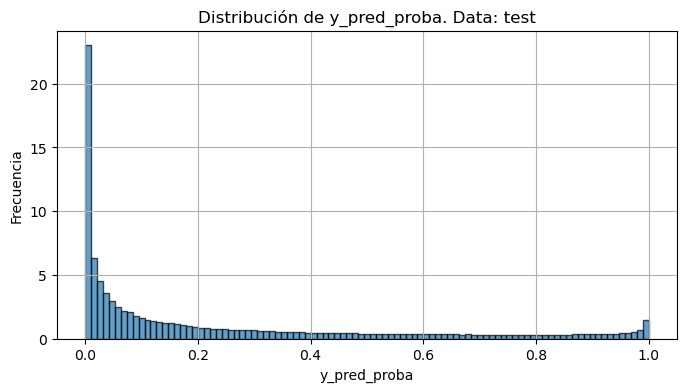

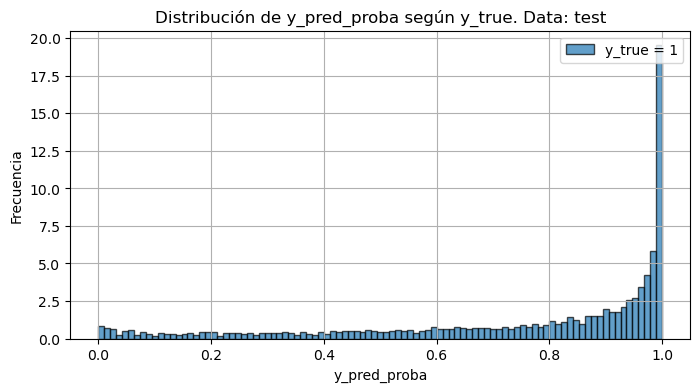

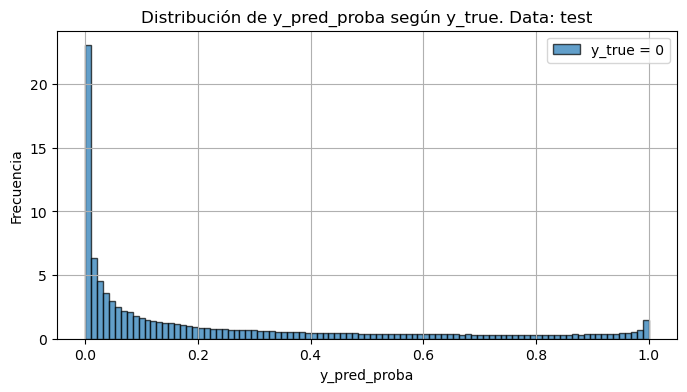

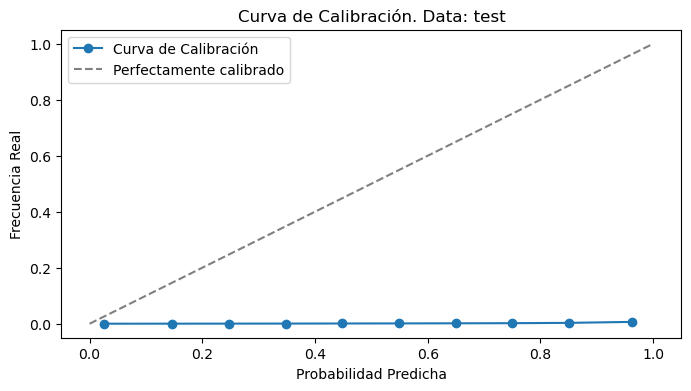

In [ ]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

In [ ]:
# util para poder optimizar mas adelante
train = info_save_temp['Votaciones']['train']
test = info_save_temp['Votaciones']['test']

In [ ]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

[03/28/25 16:32:26] INFO     Iniciando el calculo de las metricas...                                   ]8;id=260267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#920\920]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=255926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=326110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#926\926]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=96472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=782354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=560968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 6778183. DATASET: train                                            ]8;id=309544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[03/28/25 16:32:59] INFO     TOP N: 1694545. DATASET: test                                             ]8;id=877212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=988011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test           0.448       Run0      MLP_0   
           true_sum n_top test            3804       Run0      MLP_0   
           backtest       test          0.2245       Run0      MLP_0   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[03/28/25 16:33:07] INFO     Models: best_unbiased_model                                               ]8;id=306860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=92088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=257258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 6778183. DATASET: train                                            ]8;id=217100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   24.3s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   48.3s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[03/28/25 16:34:23] INFO     TOP N: 1694545. DATASET: test                                             ]8;id=73099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=105156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    1.9s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   12.6s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   16.6s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.4315       Run8  random_forest_8   
           true_sum n_top test            3664       Run8  random_forest_8   
           backtest       test          0.2162       Run8  random_forest_8   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[03/28/25 16:34:42] INFO     Models: best_fitting_model                                                ]8;id=873249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=312474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=192686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 6778183. DATASET: train                                            ]8;id=973155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=789415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.3s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   24.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   48.6s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[03/28/25 16:35:59] INFO     TOP N: 1694545. DATASET: test                                             ]8;id=108841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    1.9s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   12.6s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   16.6s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.4315       Run8  random_forest_8   
           true_sum n_top test            3664       Run8  random_forest_8   
           backtest       test          0.2162       Run8  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[03/28/25 16:36:18] INFO     Estrategy: modelo_produccion                                              ]8;id=792455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=677351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 6778183. DATASET: train                                            ]8;id=174790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=304979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[03/28/25 16:36:30] INFO     TOP N: 1694545. DATASET: test                                             ]8;id=69913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=274269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

value             name_model  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          0.4662  [0, 1, 2, 3, 6, 7, 9]   
           true_sum n_top test            3959  [0, 1, 2, 3, 6, 7, 9]   
           backtest       test          0.2336  [0, 1, 2, 3, 6, 7, 9]   

                                       model_name       select_model  
class_name metric_name    dataset_name                                
1          f1-score n_top test           Ensamble  modelo_produccion  
           true_sum n_top test           Ensamble  modelo_produccion  
           backtest       test           Ensamble  modelo_produccion

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                      
Precision n_top test         1          best_fitting_model  Run8                   0.2162   
                                        best_model_name     Run0                   0.2245   
                                        best_unbiased_model Run8                   0.2162   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.2336   
                train        1          best_fitting_model  Run8                    0.216   
                                        best_model_name     Run0                   0.2362   
                                        best_unbiased_model Run8                    0.216   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   0.247   
backtest        test         1          best_fitting_model  Run8                   0.2162   
                                        best_model_name     Run0                   0.2245   
                                        best_unbiased_model Run8                   0.2162   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.2336   
                train        1          best_fitting_model  Run8                    0.216   
                                        best_model_name     Run0                   0.2362   
                                        best_unbiased_model Run8                    0.216   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   0.247   
f1-score n_top  test         1          best_fitting_model  Run8                   0.4315   
                                        best_model_name     Run0                    0.448   
                                        best_unbiased_model Run8                   0.4315   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.4662   
                train        1          best_fitting_model  Run8                    0.431   
                                        best_model_name     Run0                   0.4713   
                                        best_unbiased_model Run8                    0.431   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.4928   
recall n_top    test         1          best_fitting_model  Run8                    100.0   
                                        best_model_name     Run0                    100.0   
                                        best_unbiased_model Run8                    100.0   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   100.0   
                train        1          best_fitting_model  Run8                    100.0   
                                        best_model_name     Run0                    100.0   
                                        best_unbiased_model Run8                    100.0   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   100.0   

                                                                                        model_name  
metric_name     dataset_name class_name select_model        name_model                              
Precision n_top test         1          best_fitting_model  Run8                   random_forest_8  
                                        best_model_name     Run0                             MLP_0  
                                        best_unbiased_model Run8                   random_forest_8  
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]         Ensamble  
                train        1          best_fitting_model  Run8                   random_forest_8  
                                        best_model_name     Run0                             MLP_0  
                                        best_unbiased_model Run8                   random_forest_8  
            

In [ ]:
# sin eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

In [ ]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

prob_min  prob_max  tasa_aperturas
0     98.94    100.00            1.31
1     96.48     98.94            0.85
2     93.13     96.48            0.66
3     89.29     93.13            0.53
4     85.18     89.29            0.47

prob_min  prob_max  tasa_aperturas
0     98.93    100.00            1.19
1     96.46     98.93            0.75
2     93.12     96.46            0.58
3     89.28     93.12            0.48
4     85.13     89.28            0.44

# optimizar ensamblado

In [ ]:
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(5648486, 8)

In [ ]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [ ]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = False

In [ ]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = True

In [32]:
mejor_test_dado_mejores_train = False
ignore_train = True
first_loop = True

In [33]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')        
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')
    if first_loop == True:
        break
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")
epochs.shape

N TOP 1129697 .EMPEZAMOS:  test Data


[03/28/25 16:40:02] INFO     Numero de iteraciones: 2059. test Data                                ]8;id=716168;file:///tmp/ipykernel_25274/3713006134.py\3713006134.py]8;;\:]8;id=334126;file:///tmp/ipykernel_25274/3713006134.py#42\42]8;;\

[03/28/25 16:42:51] INFO     TP: 3800.0. True: 4233.0. Tasa de Exito: 0.3364%. Usando 0.2 deciles  ]8;id=966913;file:///tmp/ipykernel_25274/3713006134.py\3713006134.py]8;;\:]8;id=860207;file:///tmp/ipykernel_25274/3713006134.py#61\61]8;;\
                             para test Data                                                                        

                    INFO     Numero de Iteraciones Finales: 1. test Data                           ]8;id=650283;file:///tmp/ipykernel_25274/3713006134.py\3713006134.py]8;;\:]8;id=652193;file:///tmp/ipykernel_25274/3713006134.py#63\63]8;;\

------------------------


                    INFO     Hrs: 0. Min 2.817877101898193                                         ]8;id=505795;file:///tmp/ipykernel_25274/3713006134.py\3713006134.py]8;;\:]8;id=775963;file:///tmp/ipykernel_25274/3713006134.py#74\74]8;;\

(2059, 1)

In [34]:
print(mejor_test_dado_mejores_train)
print(ignore_train)
print(first_loop)

False
True
True


In [35]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


Run0  Run1  Run2  Run3  Run6  Run7  Run9
243     0     1     0     0     0     0     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
243        0.3349
3          0.3340
27         0.3114
729        0.3088
9          0.3060
1          0.3058
81         0.3041

Cominaciones e ietraciones de modelos unicos


Run0  Run1  Run2  Run3  Run6  Run7  Run9
729     1     0     0     0     0     0     0
243     0     1     0     0     0     0     0
81      0     0     1     0     0     0     0
27      0     0     0     1     0     0     0
9       0     0     0     0     1     0     0
3       0     0     0     0     0     1     0
1       0     0     0     0     0     0     1

Decil 1:  (243, 0.572)
Decil 2:  (243, 0.3349)
Decil 3:  (243, 0.2333)


In [36]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


Run0  Run1  Run2  Run3  Run6  Run7  Run9
501     0     2     0     0     1     2     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
501        0.3364
1221       0.3363
249        0.3362
519        0.3361
258        0.3361

Decil 1:  (501, 0.5773)
Decil 2:  (501, 0.3364)
Decil 3:  (501, 0.2352)


In [37]:
iterr = [501,1221,249,519,258] # test best in test
iterr2 = iterr   # test best in train
iterr3 = []#[81,163,405,171,189] # train best in test
iterr4 = iterr3 # train best in train

In [38]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [258, 1221, 519, 243, 501, 249]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1]


In [39]:
# con eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05    0.10    0.20    0.30    0.50    1.00
Iteraccion                                                        
258         0.2408  0.4695  0.5768  0.6722  0.7060  0.7289  0.7494
1221        0.2429  0.4688  0.5800  0.6726  0.7048  0.7294  0.7494
519         0.2431  0.4658  0.5761  0.6722  0.7057  0.7290  0.7494
243         0.2424  0.4642  0.5720  0.6697  0.7000  0.7135  0.7494
501         0.2424  0.4706  0.5773  0.6727  0.7057  0.7289  0.7494
249         0.2388  0.4690  0.5763  0.6724  0.7039  0.7214  0.7494

In [40]:
# sin eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10    0.20    0.30    0.50    1.00
Iteraccion                                                        
258         0.2408  0.4695  0.5768  0.6722  0.7060  0.7289  0.7494
1221        0.2429  0.4688  0.5800  0.6726  0.7048  0.7294  0.7494
519         0.2431  0.4658  0.5761  0.6722  0.7057  0.7290  0.7494
243         0.2424  0.4642  0.5720  0.6697  0.7000  0.7135  0.7494
501         0.2424  0.4706  0.5773  0.6727  0.7057  0.7289  0.7494
249         0.2388  0.4690  0.5763  0.6724  0.7039  0.7214  0.7494

In [ ]:
# sin eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

In [ ]:
# con eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

<Axes: ylabel='Iteraccion'>

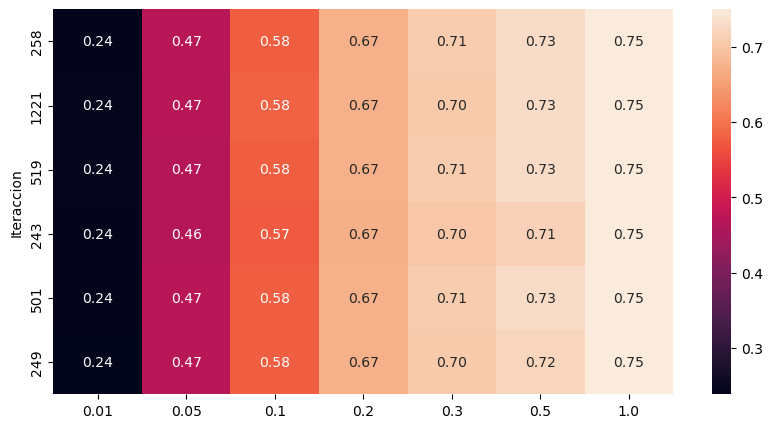

In [41]:
# con eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

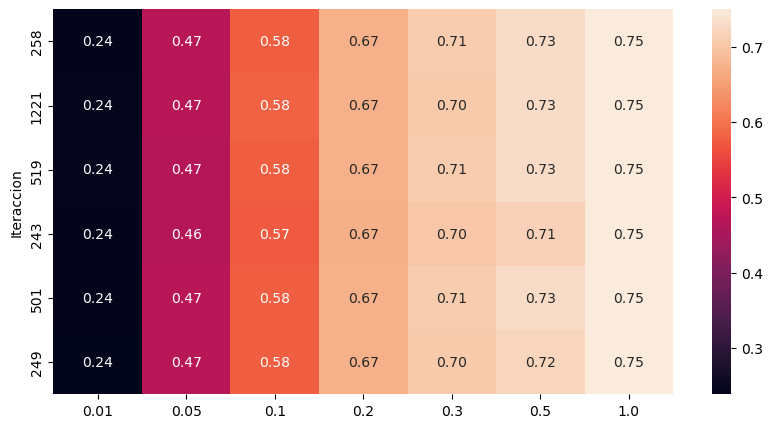

In [42]:
# con eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

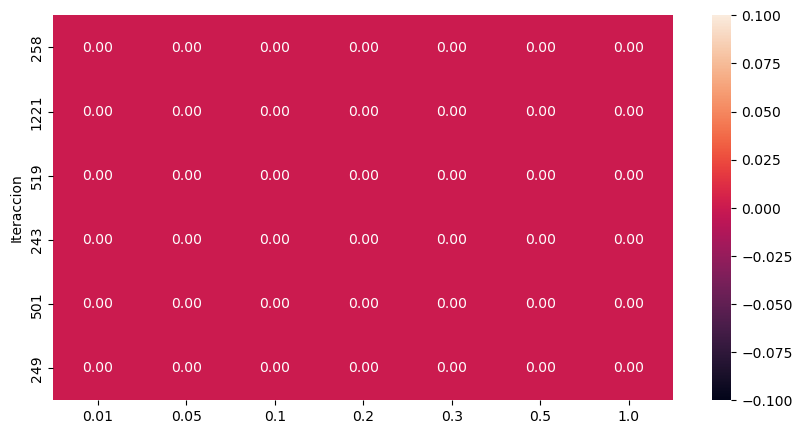

In [43]:
# con eda test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

In [ ]:
# sin eda
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

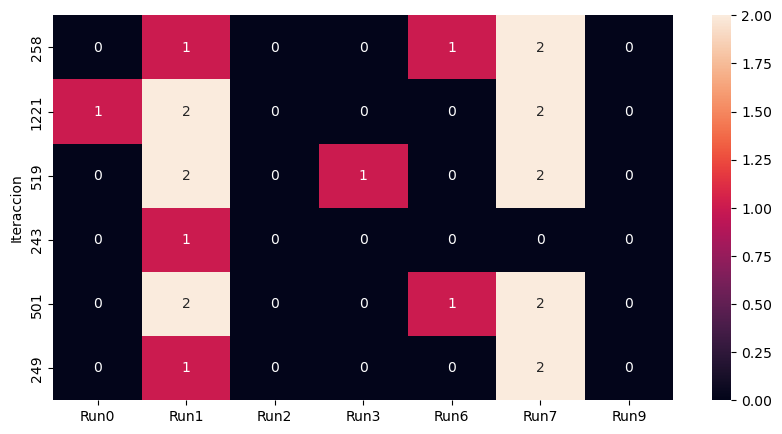

In [44]:
# con eda
plt.figure(figsize = (10,5)) #modelo mejor: 501
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# sin eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [46]:
# ensamble sin optimizar
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                      
Precision n_top test         1          best_fitting_model  Run8                   0.2162   
                                        best_model_name     Run0                   0.2245   
                                        best_unbiased_model Run8                   0.2162   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.2336   
                train        1          best_fitting_model  Run8                    0.216   
                                        best_model_name     Run0                   0.2362   
                                        best_unbiased_model Run8                    0.216   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   0.247   
backtest        test         1          best_fitting_model  Run8                   0.2162   
                                        best_model_name     Run0                   0.2245   
                                        best_unbiased_model Run8                   0.2162   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.2336   
                train        1          best_fitting_model  Run8                    0.216   
                                        best_model_name     Run0                   0.2362   
                                        best_unbiased_model Run8                    0.216   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   0.247   
f1-score n_top  test         1          best_fitting_model  Run8                   0.4315   
                                        best_model_name     Run0                    0.448   
                                        best_unbiased_model Run8                   0.4315   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.4662   
                train        1          best_fitting_model  Run8                    0.431   
                                        best_model_name     Run0                   0.4713   
                                        best_unbiased_model Run8                    0.431   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]  0.4928   
recall n_top    test         1          best_fitting_model  Run8                    100.0   
                                        best_model_name     Run0                    100.0   
                                        best_unbiased_model Run8                    100.0   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   100.0   
                train        1          best_fitting_model  Run8                    100.0   
                                        best_model_name     Run0                    100.0   
                                        best_unbiased_model Run8                    100.0   
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]   100.0   

                                                                                        model_name  
metric_name     dataset_name class_name select_model        name_model                              
Precision n_top test         1          best_fitting_model  Run8                   random_forest_8  
                                        best_model_name     Run0                             MLP_0  
                                        best_unbiased_model Run8                   random_forest_8  
                                        modelo_produccion   [0, 1, 2, 3, 6, 7, 9]         Ensamble  
                train        1          best_fitting_model  Run8                   random_forest_8  
                                        best_model_name     Run0                             MLP_0  
                                        best_unbiased_model Run8                   random_forest_8  
            

In [47]:
info_save_select_ensamble = catalog.load("info_save_select") # modelo generado
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[03/28/25 17:27:43] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=733092;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=129737;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [1, 6, 7]
W:  [2, 1, 2]


value  \
metric_name     dataset_name class_name select_model        name_model           
Precision n_top test         1          best_fitting_model  Run8        0.2162   
                                        best_model_name     Run0        0.2245   
                                        best_unbiased_model Run8        0.2162   
                                        modelo_produccion   [1, 6, 7]   0.2352   
                train        1          best_fitting_model  Run8         0.216   
                                        best_model_name     Run0        0.2362   
                                        best_unbiased_model Run8         0.216   
                                        modelo_produccion   [1, 6, 7]   0.2494   
backtest        test         1          best_fitting_model  Run8        0.2162   
                                        best_model_name     Run0        0.2245   
                                        best_unbiased_model Run8        0.2162   
                                        modelo_produccion   [1, 6, 7]   0.2352   
                train        1          best_fitting_model  Run8         0.216   
                                        best_model_name     Run0        0.2362   
                                        best_unbiased_model Run8         0.216   
                                        modelo_produccion   [1, 6, 7]   0.2494   
f1-score n_top  test         1          best_fitting_model  Run8        0.4315   
                                        best_model_name     Run0         0.448   
                                        best_unbiased_model Run8        0.4315   
                                        modelo_produccion   [1, 6, 7]   0.4693   
                train        1          best_fitting_model  Run8         0.431   
                                        best_model_name     Run0        0.4713   
                                        best_unbiased_model Run8         0.431   
                                        modelo_produccion   [1, 6, 7]   0.4975   
recall n_top    test         1          best_fitting_model  Run8         100.0   
                                        best_model_name     Run0         100.0   
                                        best_unbiased_model Run8         100.0   
                                        modelo_produccion   [1, 6, 7]    100.0   
                train        1          best_fitting_model  Run8         100.0   
                                        best_model_name     Run0         100.0   
                                        best_unbiased_model Run8         100.0   
                                        modelo_produccion   [1, 6, 7]    100.0   

                                                                             model_name  
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run8        random_forest_8  
                                        best_model_name     Run0                  MLP_0  
                                        best_unbiased_model Run8        random_forest_8  
                                        modelo_produccion   [1, 6, 7]          Ensamble  
                train        1          best_fitting_model  Run8        random_forest_8  
                                        best_model_name     Run0                  MLP_0  
                                        best_unbiased_model Run8        random_forest_8  
                                        modelo_produccion   [1, 6, 7]          Ensamble  
backtest        test         1          best_fitting_model  Run8        random_forest_8  
                                        best_model_name     Run0                  MLP_0  
                                        best_unbiased_model Run8        random_forest_8  
                                        modelo_produccion   [1, 6, 7]          Ensamble  
                train   

## backtesting

In [48]:
#info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
info_save_select = info_save_select_ensamble.copy()
print('Run_name: ',info_save_select['modelo_produccion']['nodos_select'])
print('W: ',info_save_select['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

Run_name:  [1, 6, 7]
W:  [2, 1, 2]


metric_name   value  \
select_model        name_model dataset_name class_name                       
best_fitting_model  Run8       test         1             backtest  0.2162   
                               train        1             backtest   0.216   
best_model_name     Run0       test         1             backtest  0.2245   
                               train        1             backtest  0.2362   
best_unbiased_model Run8       test         1             backtest  0.2162   
                               train        1             backtest   0.216   
modelo_produccion   [1, 6, 7]  test         1             backtest  0.2352   
                               train        1             backtest  0.2494   

                                                             model_name  
select_model        name_model dataset_name class_name                   
best_fitting_model  Run8       test         1           random_forest_8  
                               train        1           random_forest_8  
best_model_name     Run0       test         1                     MLP_0  
                               train        1                     MLP_0  
best_unbiased_model Run8       test         1           random_forest_8  
                               train        1           random_forest_8  
modelo_produccion   [1, 6, 7]  test         1                  Ensamble  
                               train        1                  Ensamble

In [49]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

REINDEX  \
llave                                                           
0                                        region3_no_relevante   
1                                           region3_santander   
2                                     region3_valle_del_cauca   
3                                      departamento_antioquia   
4                                         departamento_arauca   
5           departamento_archipielago_de_san_andres_provid...   
6                                      departamento_atlantico   
7                                    departamento_bogota_d_c_   
8                                        departamento_bolivar   
9                                         departamento_boyaca   
10                                        departamento_caldas   
11                                       departamento_caqueta   
12                                      departamento_casanare   
13                                         departamento_cauca   
14                                         departamento_cesar   
15                                         departamento_choco   
16                                       departamento_cordoba   
17                                  departamento_cundinamarca   
18                                       departamento_guainia   
19                                      departamento_guaviare   
20                                         departamento_huila   
21                                    departamento_la_guajira   
22                                     departamento_magdalena   
23                                          departamento_meta   
24                                        departamento_narino   
25                            departamento_norte_de_santander   
26                                      departamento_putumayo   
27                                       departamento_quindio   
28                                     departamento_risaralda   
29                                     departamento_santander   
30                                         departamento_sucre   
31                                        departamento_tolima   
32                               departamento_valle_del_cauca   
33                                        departamento_vaupes   
34                                       departamento_vichada   
DROP_FIRST                                                NaN   

                    region3                              departamento  
llave                                                                  
0              no_relevante                               bogota_d_c_  
1           valle_del_cauca                                 antioquia  
2                 santander                                   bolivar  
3                       NaN                           valle_del_cauca  
4                       NaN                                     huila  
5                       NaN                                 atlantico  
6                       NaN                              cundinamarca  
7                       NaN                                     cesar  
8                       NaN                                    boyaca  
9                       NaN                                     sucre  
10                      NaN                                     choco  
11                      NaN                                 magdalena  
12                      NaN                                    tolima  
13                      NaN                                 santander  
14                      NaN                                 risaralda  
15                      NaN                                     cauca  
16                      NaN                                   quindio  
17                      NaN                                    caldas  
18                      NaN                                    narino  
19                      NaN                                      meta  

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 try:                                                                                         │
│   2 │   display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)          │
│ ❱ 3 │   display(info_save_select["modelo_produccion"]['ks_test'])                                │
│   4 │   display(info_save_select["modelo_produccion"]['ks_train'])                               │
│   5 except:                                                                                      │
│   6 │   display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'ks_test'

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│   3 │   display(info_save_select["modelo_produccion"]['ks_test'])                                │
│   4 │   display(info_save_select["modelo_produccion"]['ks_train'])                               │
│   5 except:                                                                                      │
│ ❱ 6 │   display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['     │
│   7                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Scaler'

In [50]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[1, 6, 7]
[2, 1, 2]


In [14]:
save_backtesting = catalog.load("data_backtesting_202502_V1")
#save_backtesting = catalog.load("data_backtesting")

[03/30/25 20:21:45] INFO     Loading data from 'data_backtesting_202502_V1' (PickleDataSet)...  ]8;id=190414;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=959623;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

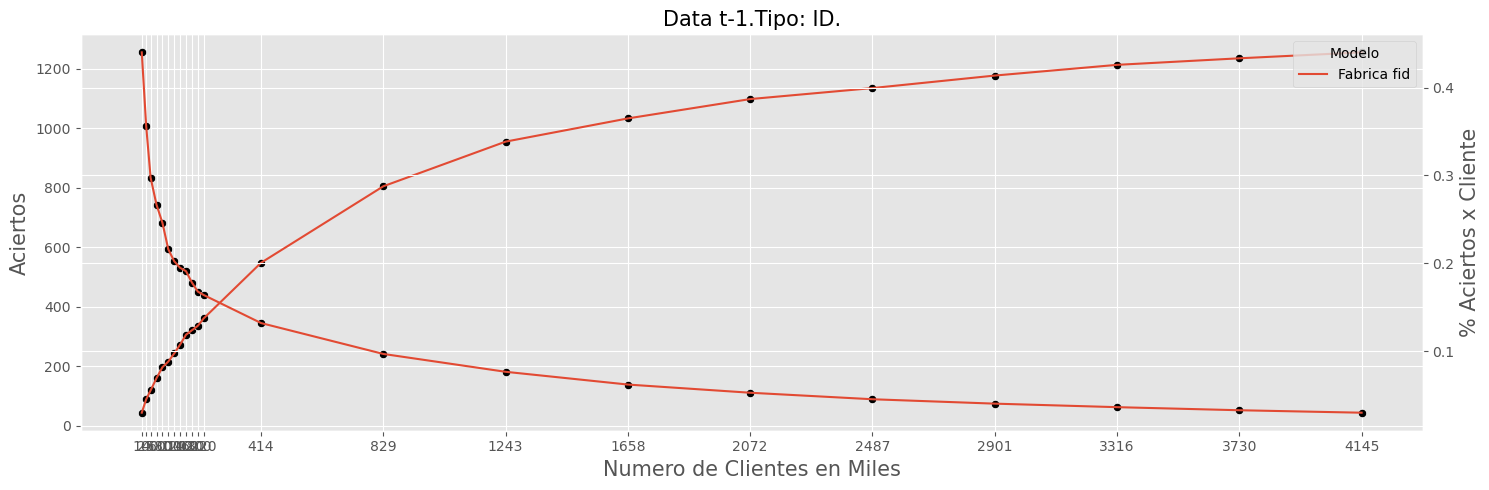

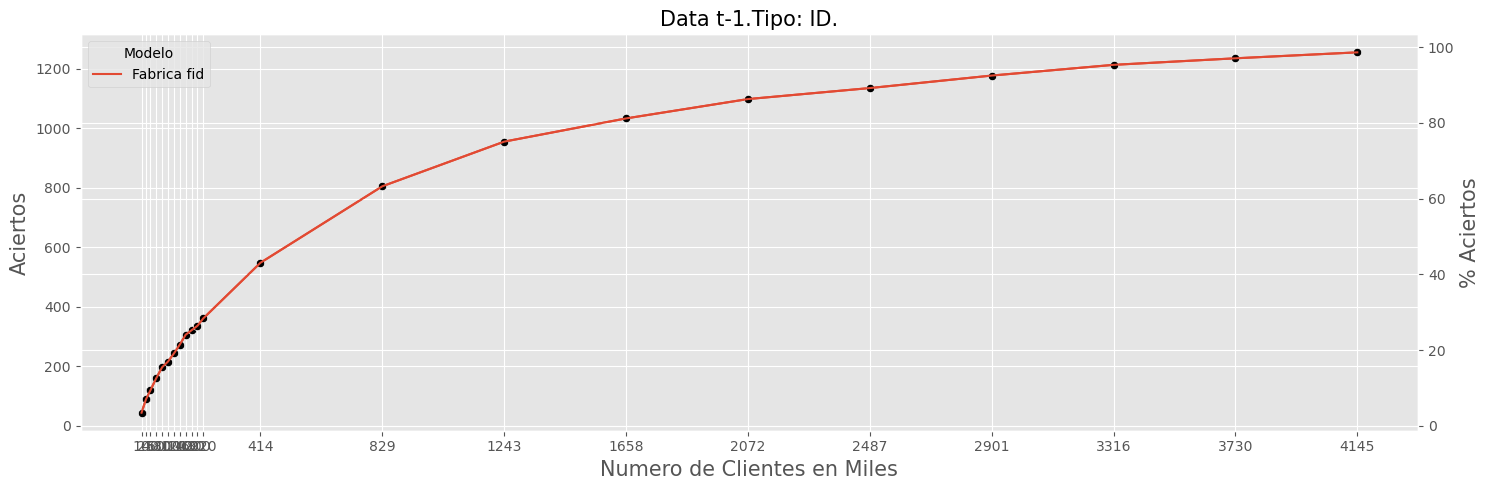

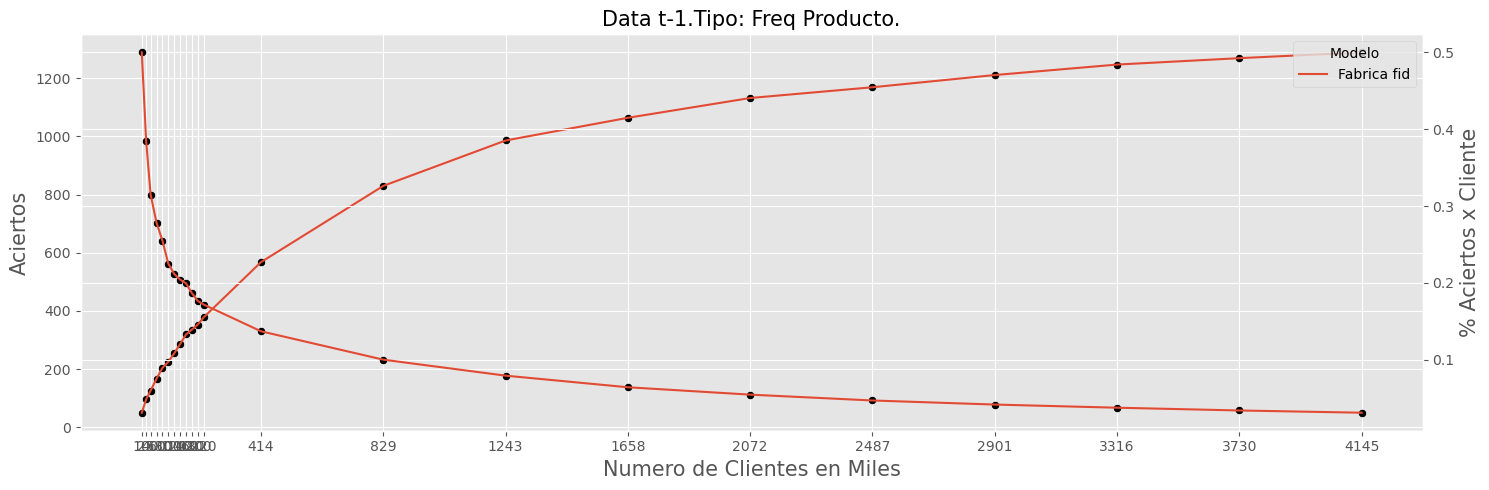

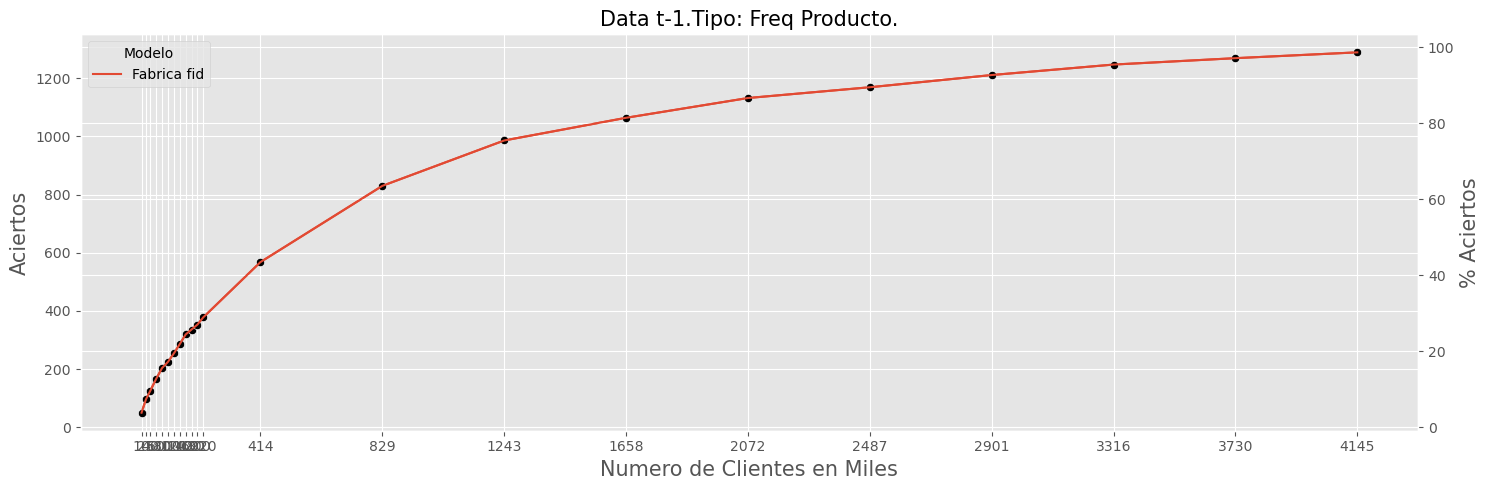

[03/30/25 20:22:18] INFO     ---------------------------------------------------                       ]8;id=608591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=589908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

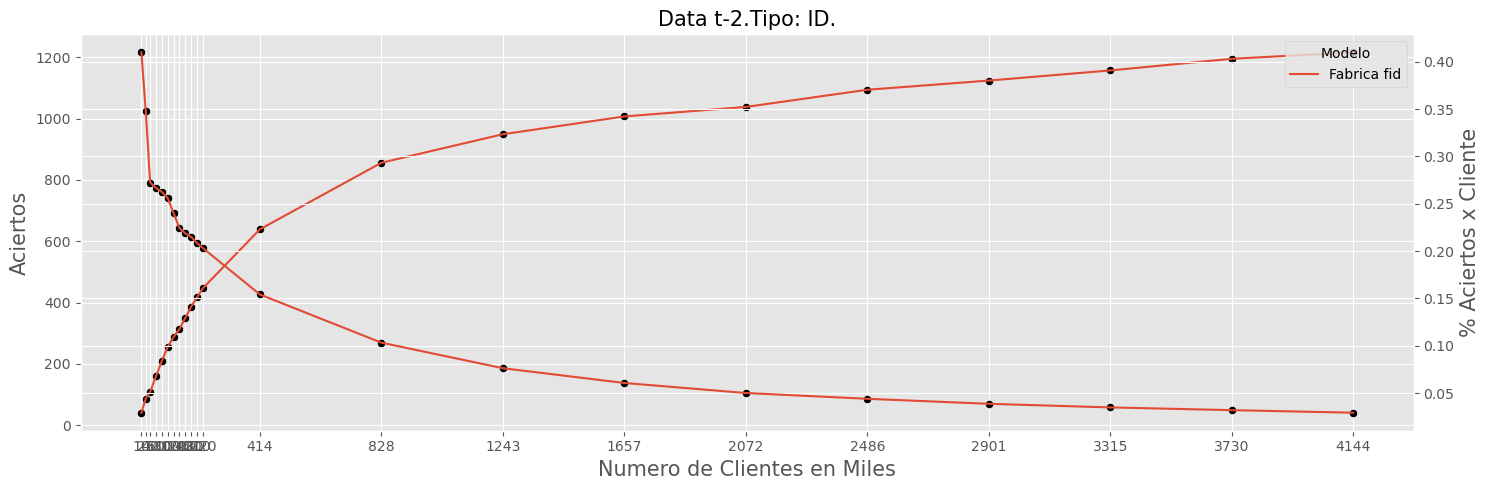

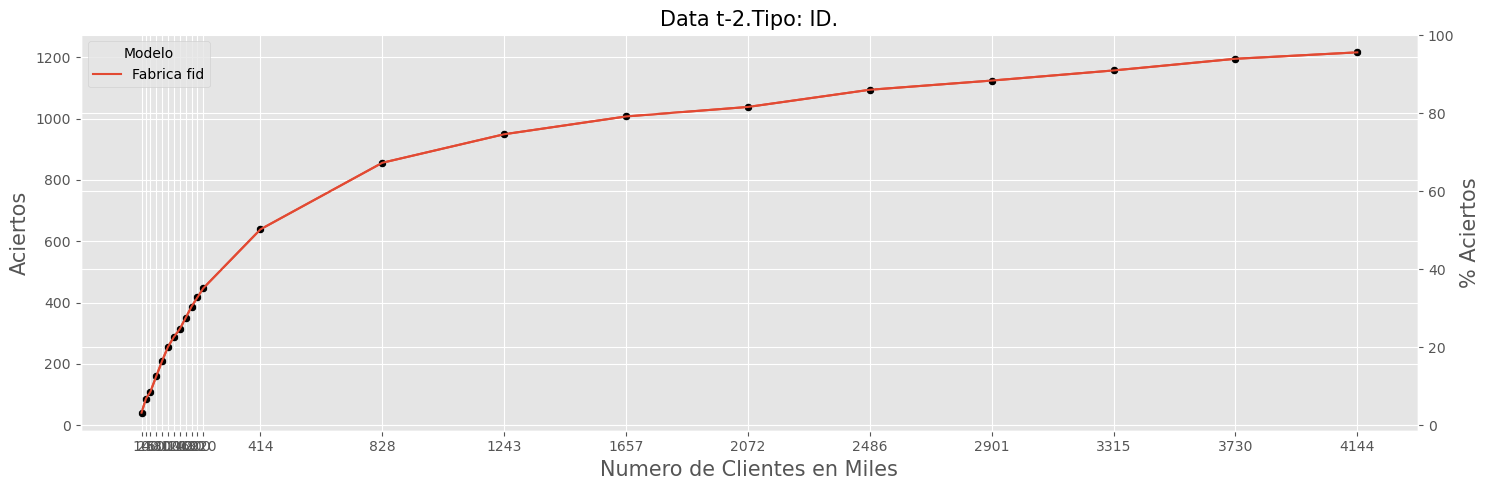

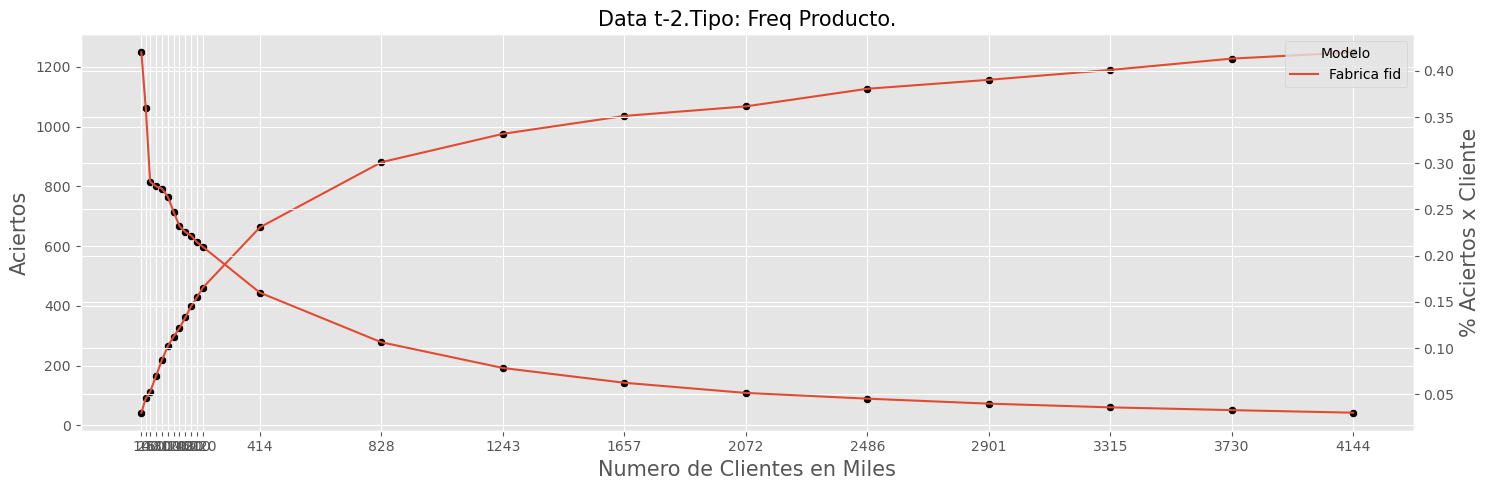

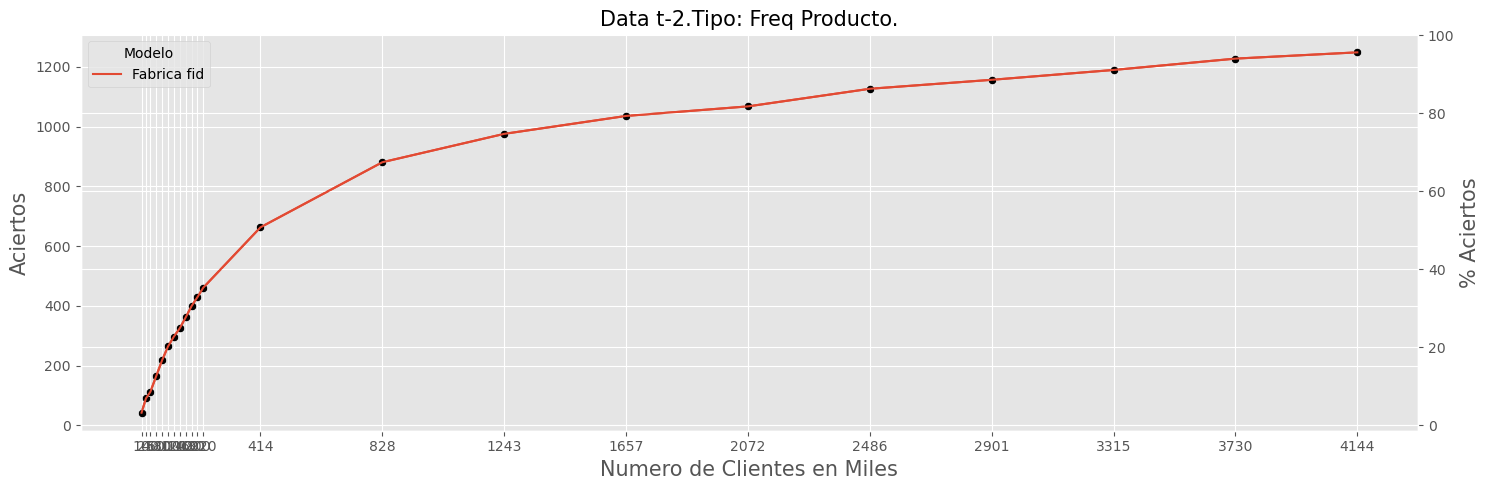

[03/30/25 20:22:20] INFO     ---------------------------------------------------                       ]8;id=761319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=636845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

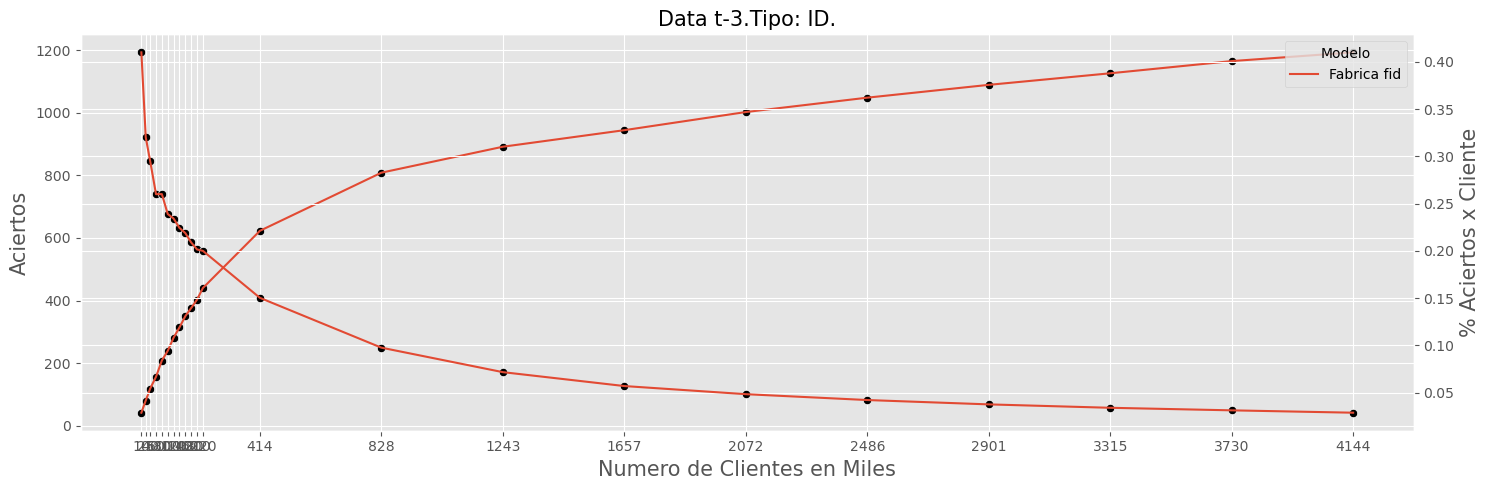

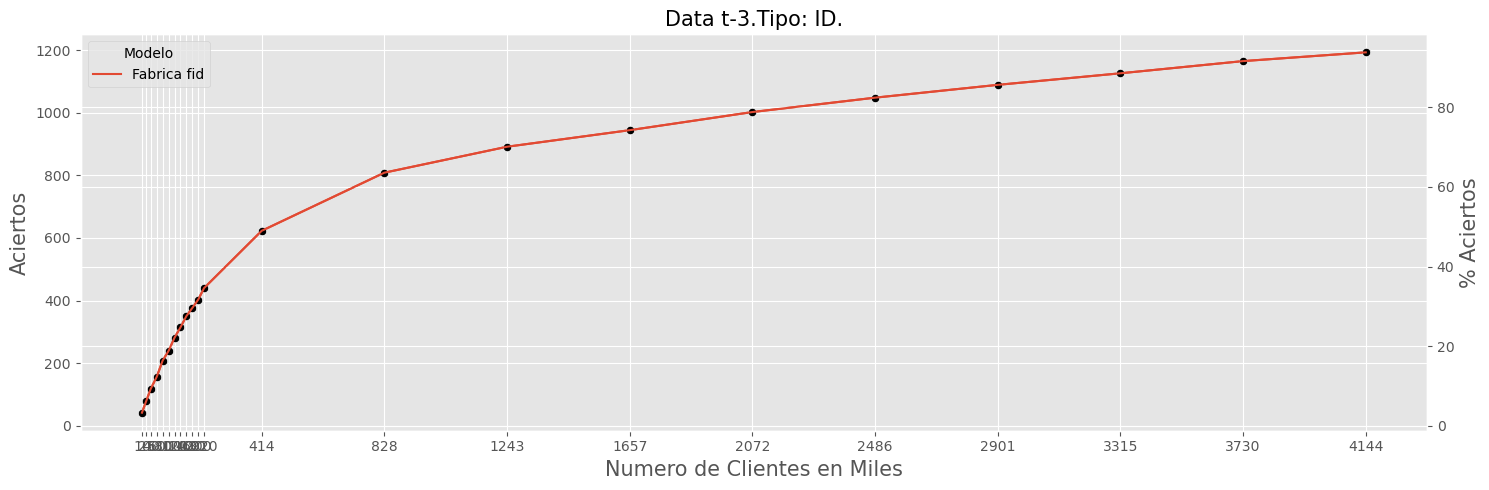

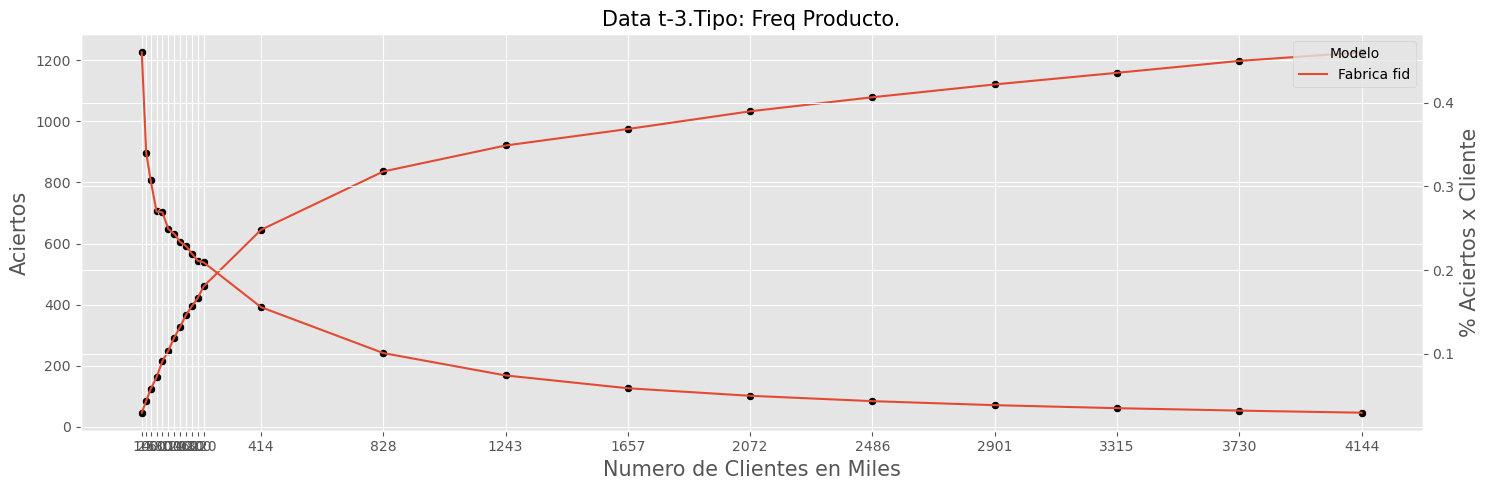

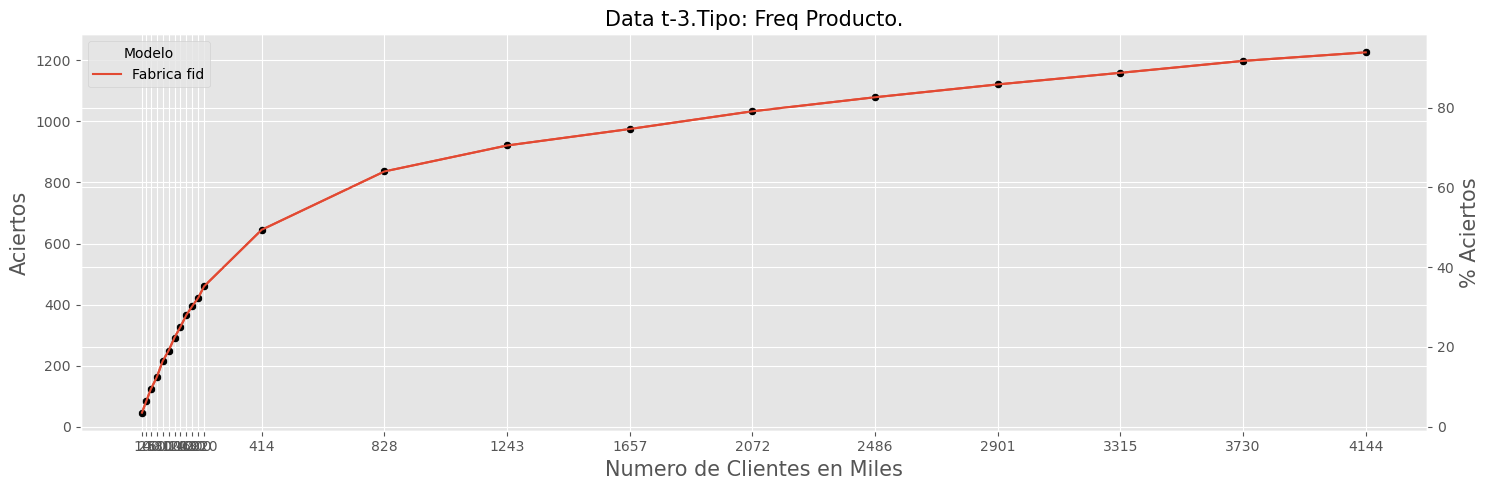

[03/30/25 20:22:21] INFO     ---------------------------------------------------                       ]8;id=130087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=690038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

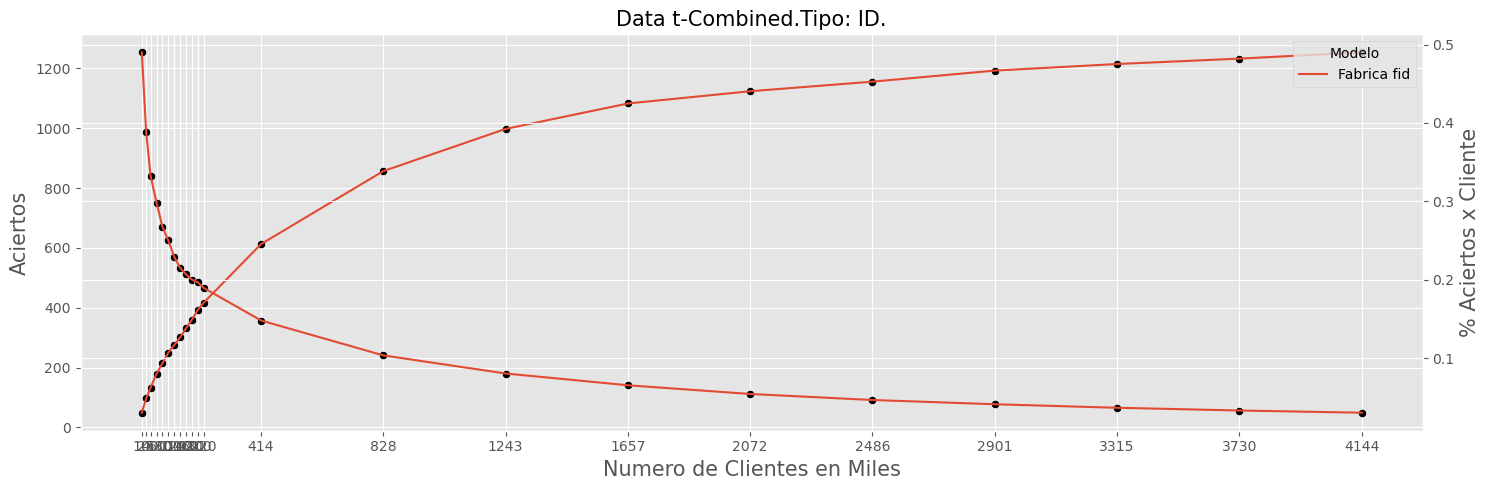

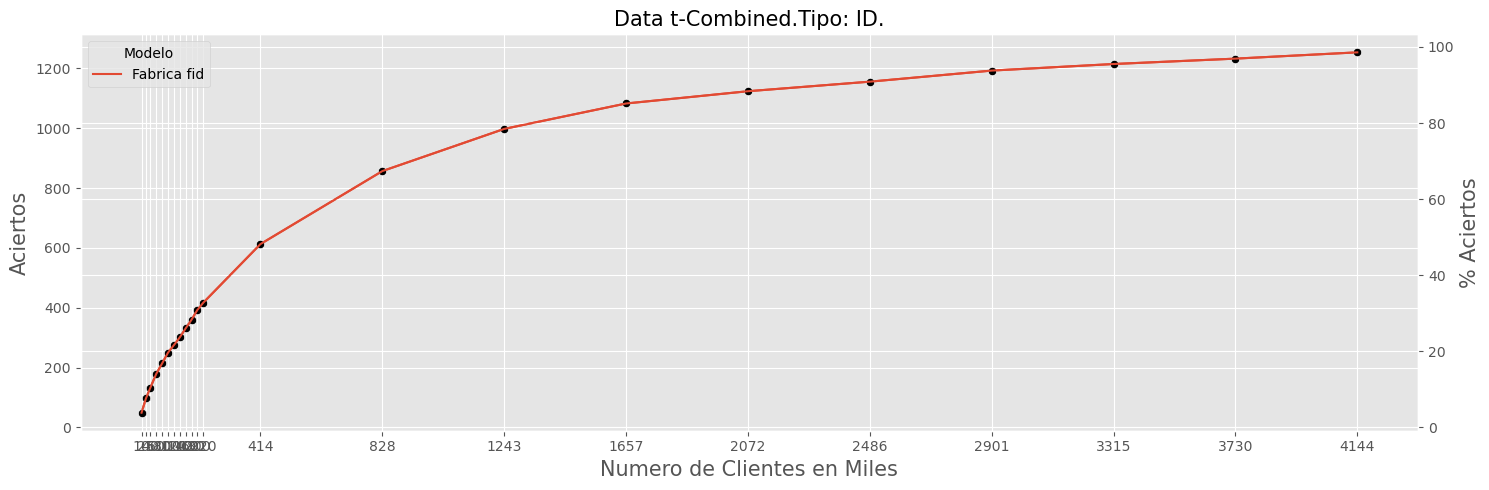

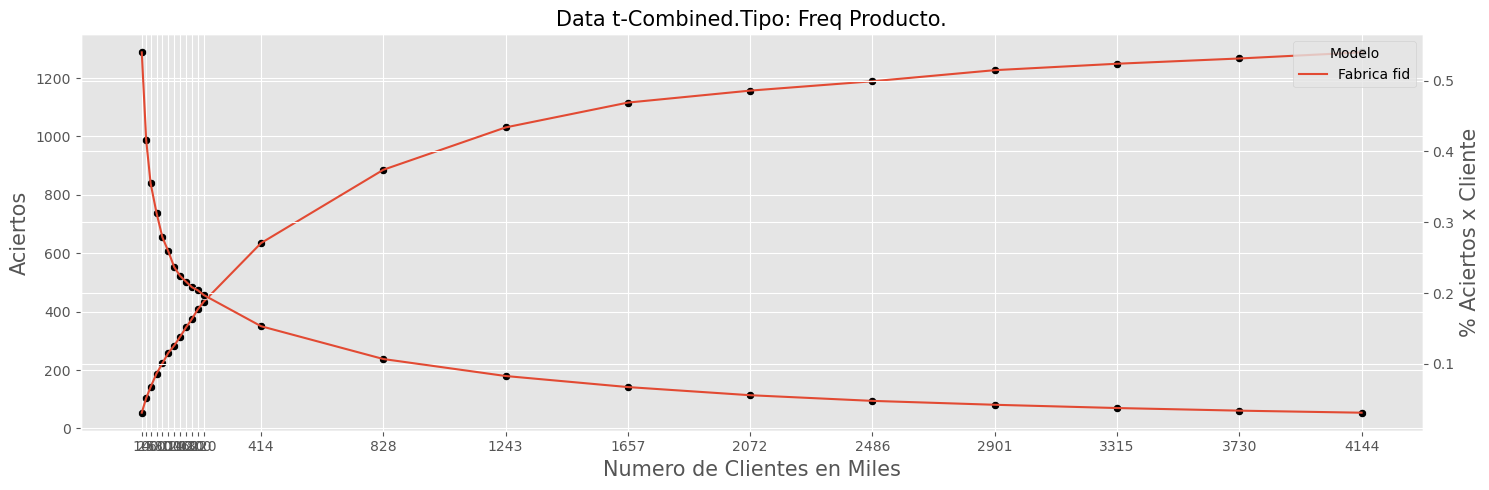

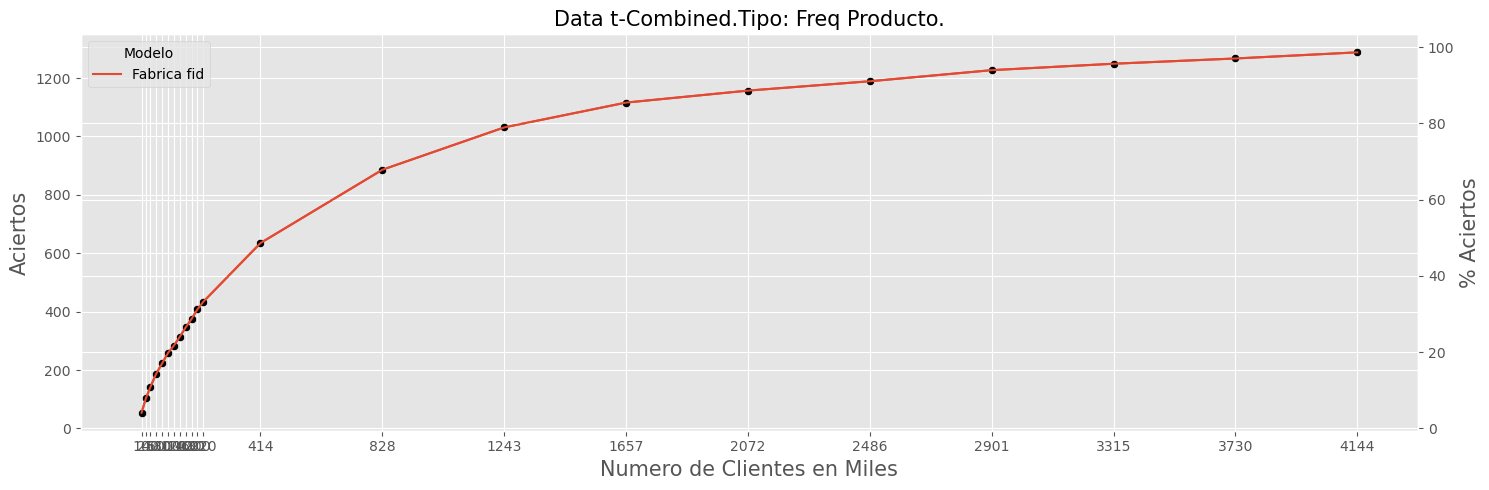

[03/30/25 20:22:23] INFO     ---------------------------------------------------                       ]8;id=734802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=388446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#356\356]8;;\

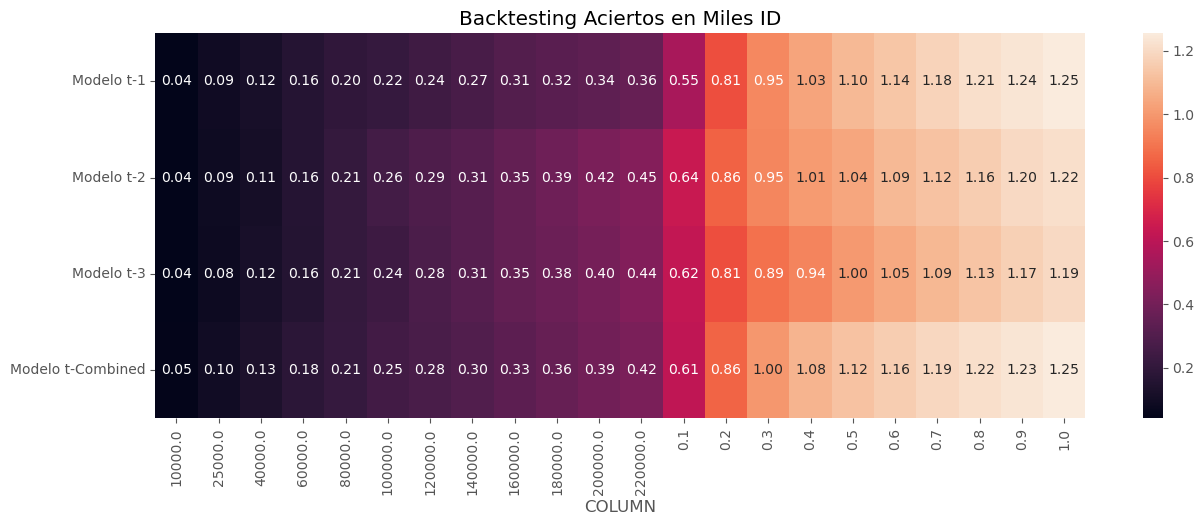

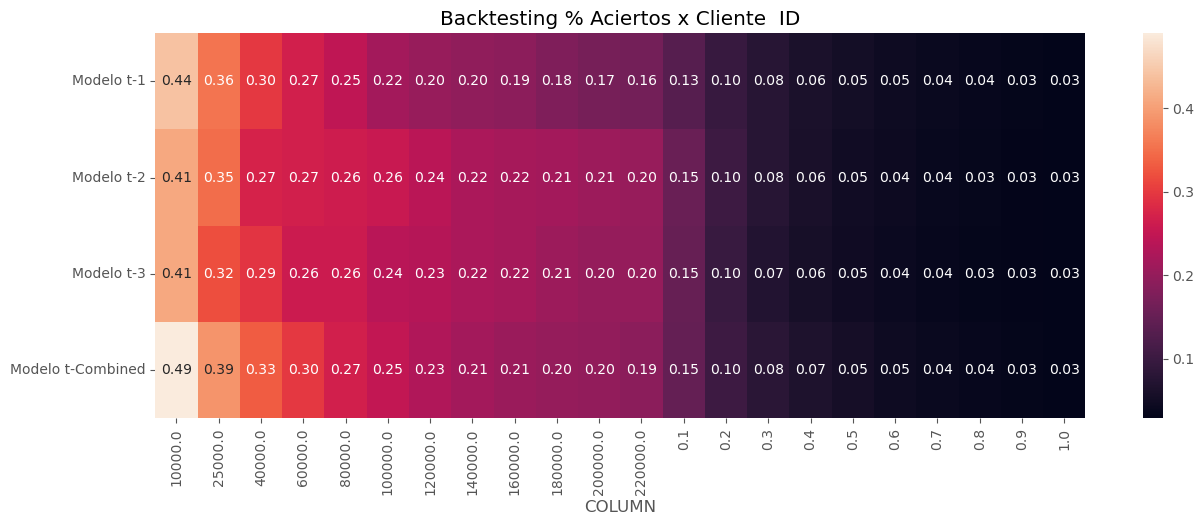

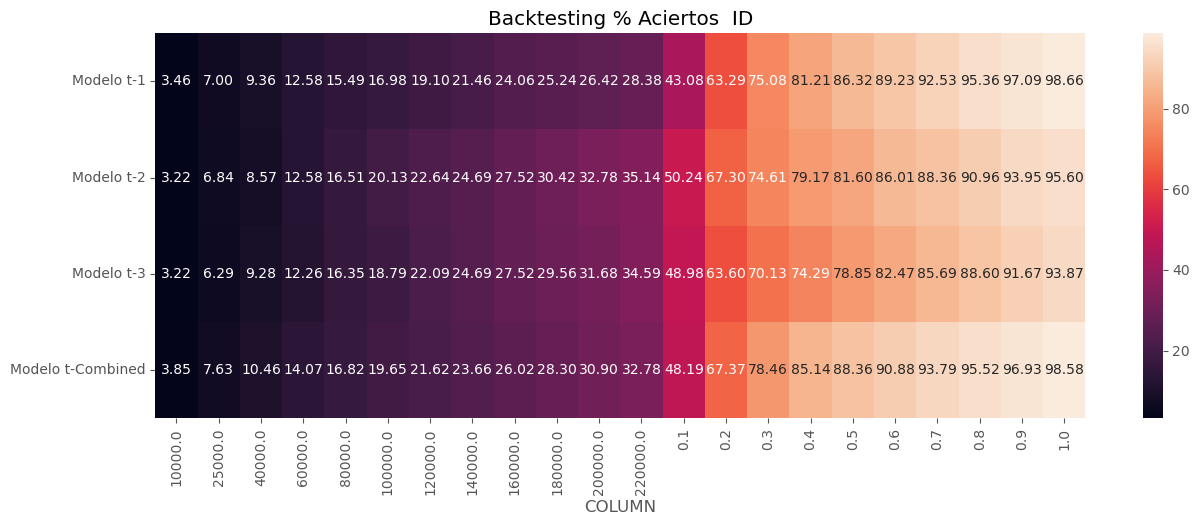

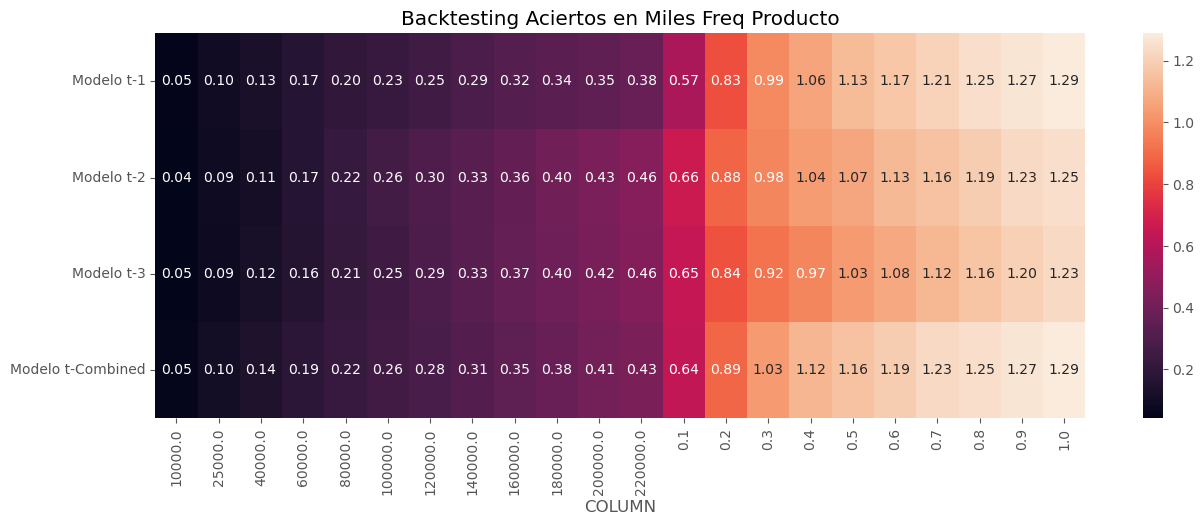

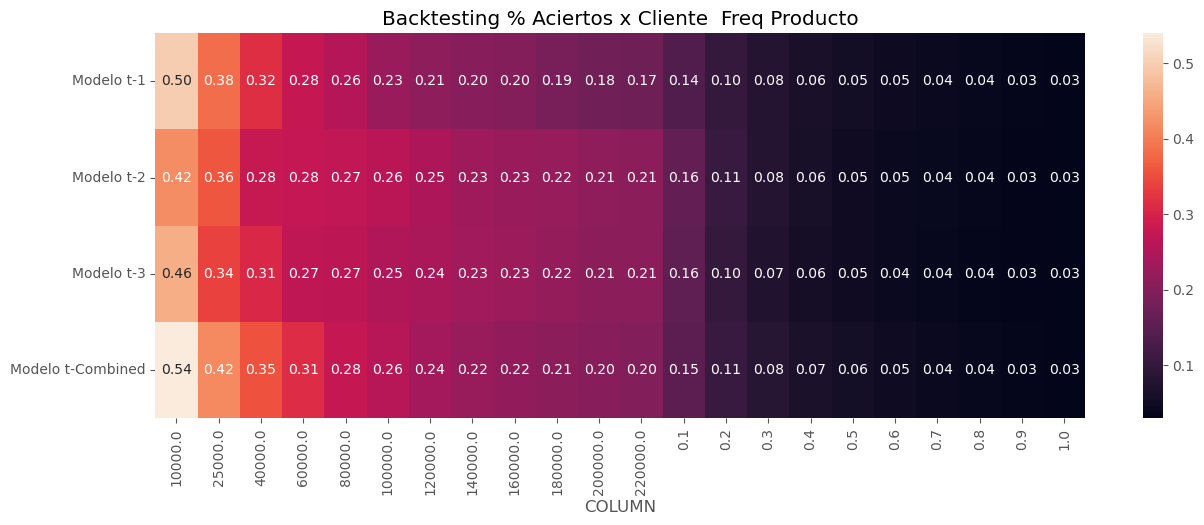

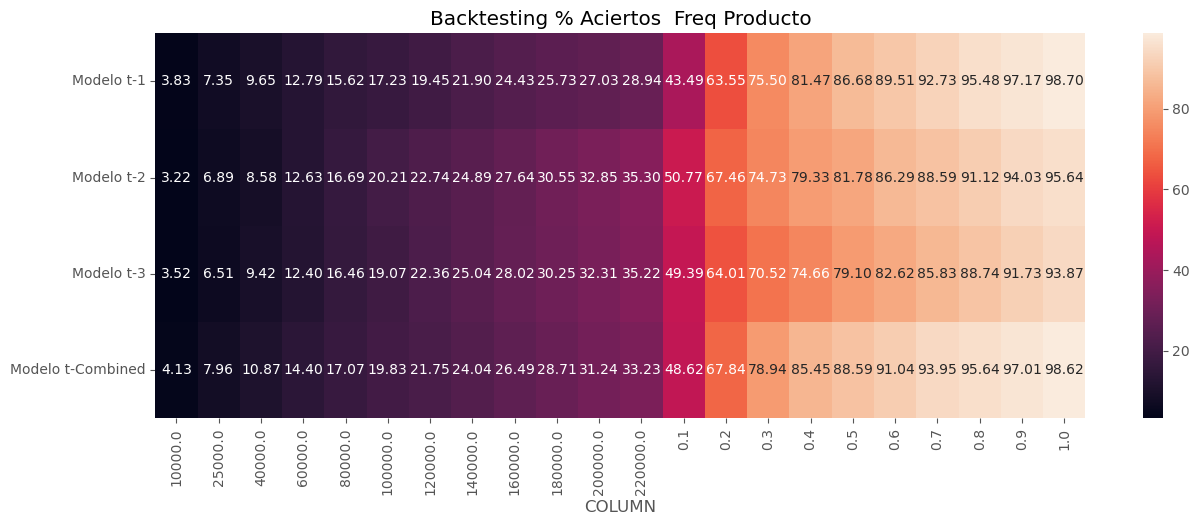

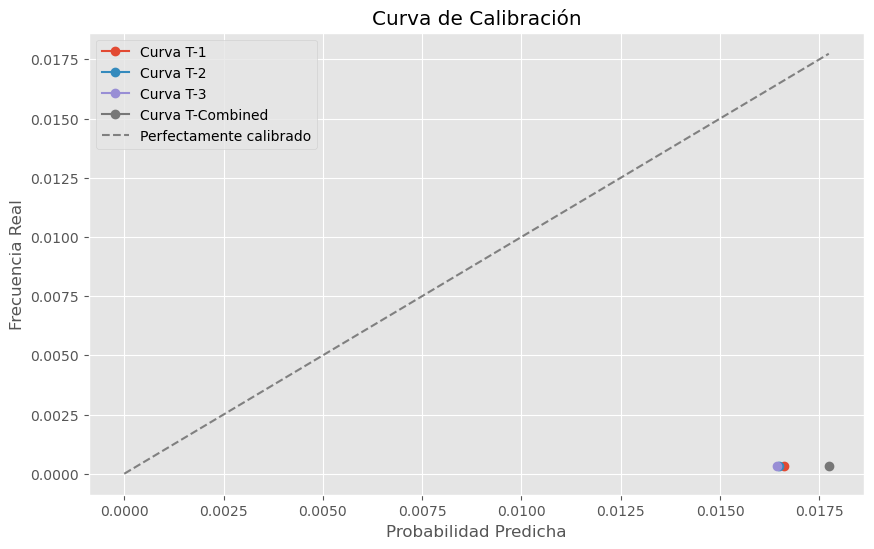

In [15]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [16]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for i in save_backtesting.keys():
    print(i,'Top Metrics')
    res = save_backtesting[i]['metrics']
    display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
    print('------------')

1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243507  
1  dim shape  4145024  
2        1.0   0.0771  
3          1   0.0771  
5          1    100.0  
7          1   0.1541  
9          1      959

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:55        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:55        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:55        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:55        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1255.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  4059328.0

------------
2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243483  
1  dim shape  4144945  
2        1.0   0.0766  
3          1   0.0766  
5          1    100.0  
7          1   0.1532  
9          1      953

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:55        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:55        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:55        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:55        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1216.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3981948.0

------------
3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144798  
2        1.0   0.0724  
3          1   0.0724  
5          1    100.0  
7          1   0.1447  
9          1      900

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:56        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:56        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:56        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:56        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1194.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3909876.0

------------
Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144799  
2        1.0   0.0807  
3          1   0.0807  
5          1    100.0  
7          1   0.1612  
9          1     1003

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:56        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:56        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:56        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:56        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1254.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3927022.0

------------


In [17]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.94      2.12          414403              548            0.13   
1      9      1.88      1.94          414602              257            0.06   
2      8      1.85      1.88          414502              150            0.04   
3      7      1.82      1.85          414503               78            0.02   
4      6      1.78      1.82          414502               65            0.02   
5      5      1.73      1.78          414502               37            0.01   
6      4      1.64      1.73          414503               42            0.01   
7      3      1.47      1.64          414500               36            0.01   
8      2      1.15      1.47          414504               22            0.01   
9      1      0.09      1.15          414503               20            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          43.67                10.0    33.67  
1          64.14                20.0    44.14  
2          76.10                30.0    46.10  
3          82.31                40.0    42.31  
4          87.49                50.0    37.49  
5          90.44                60.0    30.44  
6          93.78                70.0    23.78  
7          96.65                80.0    16.65  
8          98.41                90.0     8.41  
9         100.00               100.0     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.90      2.12          414495              639            0.15   
1      9      1.86      1.90          414494              217            0.05   
2      8      1.83      1.86          414495               93            0.02   
3      7      1.81      1.83          414494               58            0.01   
4      6      1.77      1.81          414490               31            0.01   
5      5      1.72      1.77          414483               56            0.01   
6      4      1.63      1.72          414510               30            0.01   
7      3      1.47      1.63          414494               33            0.01   
8      2      1.14      1.47          414495               38            0.01   
9      1      0.08      1.14          414495               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.55                10.0    42.55  
1          70.39                20.0    50.39  
2          78.04                30.0    48.04  
3          82.81                40.0    42.81  
4          85.36                50.0    35.36  
5          89.97                60.0    29.97  
6          92.43                70.0    22.43  
7          95.15                80.0    15.15  
8          98.27                90.0     8.27  
9         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.88      2.12          414480              623            0.15   
1      9      1.85      1.88          414480              186            0.04   
2      8      1.83      1.85          414480               83            0.02   
3      7      1.80      1.83          414479               53            0.01   
4      6      1.76      1.80          414480               58            0.01   
5      5      1.71      1.76          414480               46            0.01   
6      4      1.62      1.71          414479               41            0.01   
7      3      1.46      1.62          414480               37            0.01   
8      2      1.14      1.46          414480               39            0.01   
9      1      0.05      1.14          414480               28            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.18                10.0    42.18  
1          67.76                20.0    47.76  
2          74.71                30.0    44.71  
3          79.15                40.0    39.15  
4          84.00                50.0    34.00  
5          87.86                60.0    27.86  
6          91.29                70.0    21.29  
7          94.39                80.0    14.39  
8          97.65                90.0     7.65  
9         100.00               100.0     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.95      2.12          414377              613            0.15   
1      9      1.90      1.95          414583              244            0.06   
2      8      1.86      1.90          414480              141            0.03   
3      7      1.85      1.86          414480               85            0.02   
4      6      1.82      1.85          414479               41            0.01   
5      5      1.79      1.82          414479               32            0.01   
6      4      1.74      1.79          414481               37            0.01   
7      3      1.67      1.74          414480               22            0.01   
8      2      1.50      1.67          414480               18            0.00   
9      1      1.06      1.50          414480               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          48.88                10.0    38.89  
1          68.34                20.0    48.34  
2          79.59                30.0    49.59  
3          86.36                40.0    46.36  
4          89.63                50.0    39.63  
5          92.19                60.0    32.19  
6          95.14                70.0    25.14  
7          96.89                80.0    16.89  
8          98.33                90.0     8.33  
9         100.00               100.0     0.00

## Comparar backtesting

In [9]:
data_backtesting1 = catalog.load("data_backtesting_202502_anterior")
data_backtesting11 = catalog.load("data_backtesting_202502_V1")
#data_backtesting2 = catalog.load("data_backtesting_202502_V2")
data_backtesting22 = catalog.load("data_backtesting_202502_V3")

[03/30/25 20:18:24] INFO     Loading data from 'data_backtesting_202502_anterior'               ]8;id=288786;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=232796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

In [10]:
 nametag_model = ['202502_antes','202502 exp1','202502 exp3']
 backtesting_all = [data_backtesting1,data_backtesting11,data_backtesting22]

dict_keys(['ID', 'Freq Producto'])


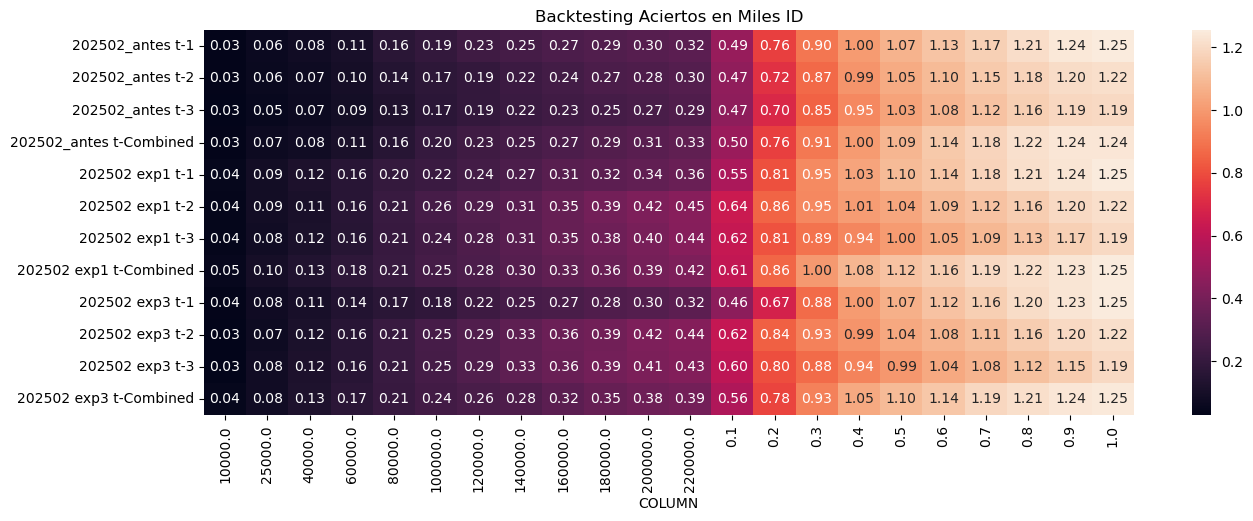

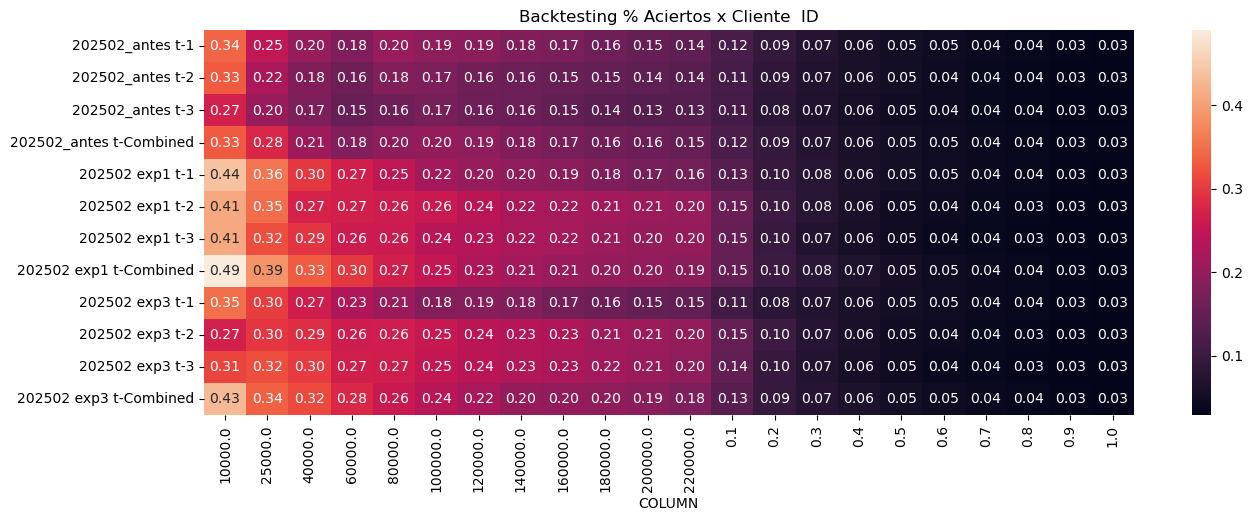

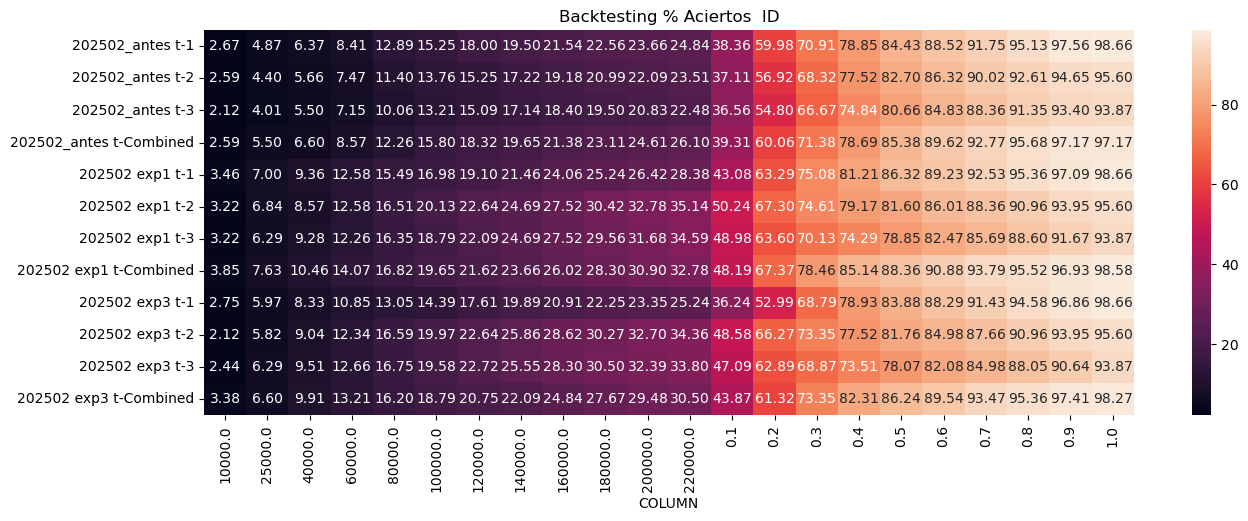

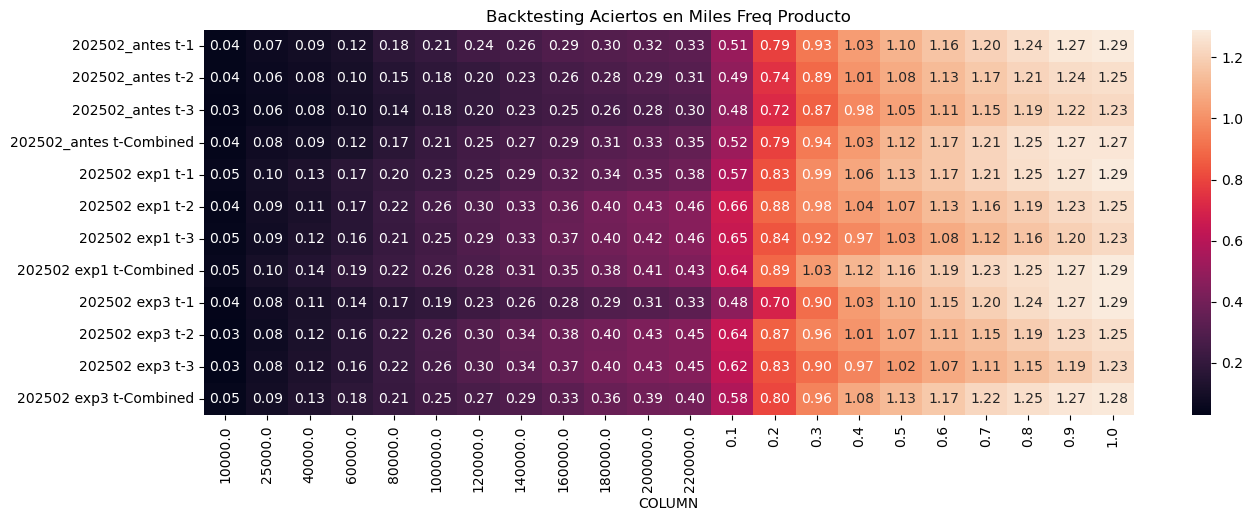

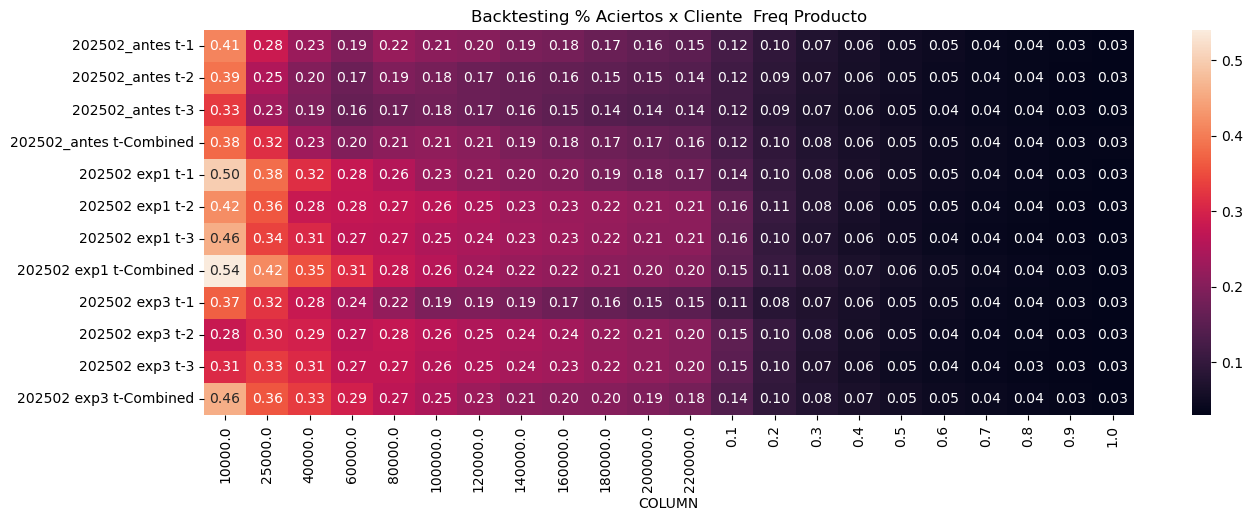

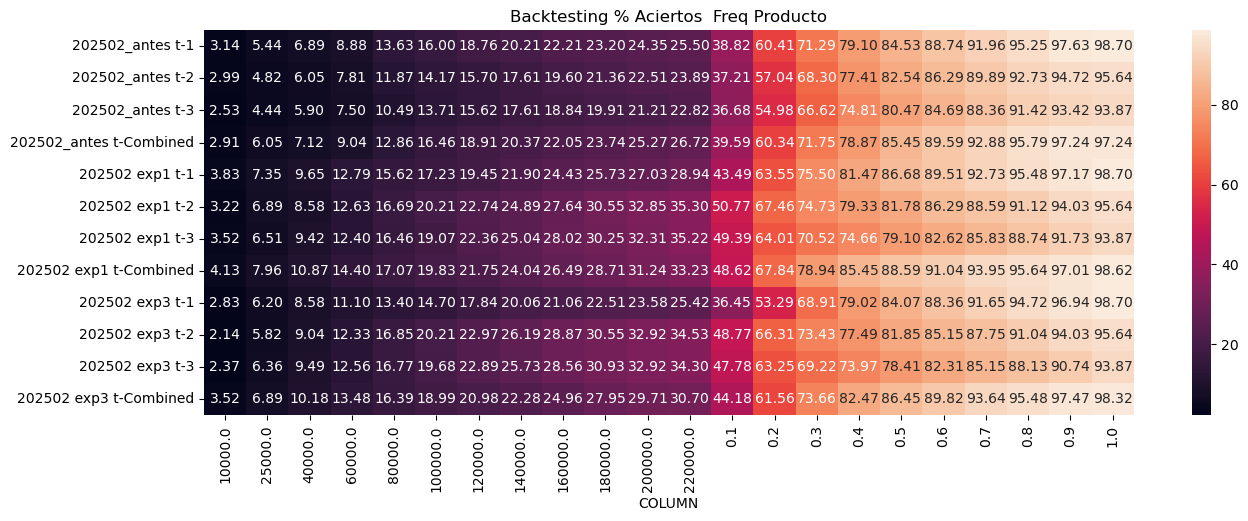

In [11]:
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,5))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [12]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

202502_antes t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.06     16.11          414503              488            0.12   
1      9      0.04      0.06          414502              275            0.07   
2      8      0.03      0.04          414502              139            0.03   
3      7      0.02      0.03          414503              101            0.02   
4      6      0.02      0.02          414502               71            0.02   
5      5      0.01      0.02          414502               52            0.01   
6      4      0.01      0.01          414503               41            0.01   
7      3      0.01      0.01          414502               43            0.01   
8      2      0.00      0.01          414500               31            0.01   
9      1      0.00      0.00          414505               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          38.88                10.0    28.88  
1          60.80                20.0    40.80  
2          71.87                30.0    41.87  
3          79.92                40.0    39.92  
4          85.58                50.0    35.58  
5          89.72                60.0    29.72  
6          92.99                70.0    22.99  
7          96.41                80.0    16.41  
8          98.88                90.0     8.88  
9         100.00               100.0     0.00

202502_antes t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.06     15.88          414495              472            0.11   
1      9      0.04      0.06          414494              252            0.06   
2      8      0.03      0.04          414495              145            0.03   
3      7      0.02      0.03          414494              117            0.03   
4      6      0.02      0.02          414494               66            0.02   
5      5      0.02      0.02          414495               46            0.01   
6      4      0.01      0.02          414494               47            0.01   
7      3      0.01      0.01          414495               33            0.01   
8      2      0.00      0.01          414494               26            0.01   
9      1      0.00      0.00          414495               12            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          38.82                10.0    28.82  
1          59.54                20.0    39.54  
2          71.46                30.0    41.46  
3          81.09                40.0    41.09  
4          86.51                50.0    36.51  
5          90.30                60.0    30.30  
6          94.16                70.0    24.16  
7          96.88                80.0    16.87  
8          99.01                90.0     9.01  
9         100.00               100.0     0.00

202502_antes t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.06     15.86          414480              465            0.11   
1      9      0.04      0.06          414480              232            0.06   
2      8      0.03      0.04          414480              151            0.04   
3      7      0.02      0.03          414479              104            0.03   
4      6      0.02      0.02          414480               74            0.02   
5      5      0.02      0.02          414480               53            0.01   
6      4      0.01      0.02          414479               45            0.01   
7      3      0.01      0.01          414480               38            0.01   
8      2      0.00      0.01          414480               26            0.01   
9      1      0.00      0.00          414480                6            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          38.94                10.0    28.94  
1          58.38                20.0    38.38  
2          71.02                30.0    41.02  
3          79.73                40.0    39.73  
4          85.93                50.0    35.93  
5          90.37                60.0    30.37  
6          94.14                70.0    24.14  
7          97.32                80.0    17.32  
8          99.50                90.0     9.50  
9         100.00               100.0     0.00

202502_antes t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.07     16.11          367406              460            0.13   
1      9      0.05      0.07          367405              263            0.07   
2      8      0.04      0.05          367405              146            0.04   
3      7      0.03      0.04          367405               94            0.03   
4      6      0.03      0.03          367405               73            0.02   
5      5      0.02      0.03          367406               68            0.02   
6      4      0.02      0.02          367405               44            0.01   
7      3      0.02      0.02          367405               36            0.01   
8      2      0.01      0.02          367405               33            0.01   
9      1      0.01      0.01          367406               19            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          37.22                10.0    27.22  
1          58.50                20.0    38.50  
2          70.31                30.0    40.31  
3          77.91                40.0    37.91  
4          83.82                50.0    33.82  
5          89.32                60.0    29.32  
6          92.88                70.0    22.88  
7          95.79                80.0    15.79  
8          98.46                90.0     8.46  
9         100.00               100.0     0.00

202502 exp1 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.94      2.12          414403              548            0.13   
1      9      1.88      1.94          414602              257            0.06   
2      8      1.85      1.88          414502              150            0.04   
3      7      1.82      1.85          414503               78            0.02   
4      6      1.78      1.82          414502               65            0.02   
5      5      1.73      1.78          414502               37            0.01   
6      4      1.64      1.73          414503               42            0.01   
7      3      1.47      1.64          414500               36            0.01   
8      2      1.15      1.47          414504               22            0.01   
9      1      0.09      1.15          414503               20            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          43.67                10.0    33.67  
1          64.14                20.0    44.14  
2          76.10                30.0    46.10  
3          82.31                40.0    42.31  
4          87.49                50.0    37.49  
5          90.44                60.0    30.44  
6          93.78                70.0    23.78  
7          96.65                80.0    16.65  
8          98.41                90.0     8.41  
9         100.00               100.0     0.00

202502 exp1 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.90      2.12          414495              639            0.15   
1      9      1.86      1.90          414494              217            0.05   
2      8      1.83      1.86          414495               93            0.02   
3      7      1.81      1.83          414494               58            0.01   
4      6      1.77      1.81          414490               31            0.01   
5      5      1.72      1.77          414483               56            0.01   
6      4      1.63      1.72          414510               30            0.01   
7      3      1.47      1.63          414494               33            0.01   
8      2      1.14      1.47          414495               38            0.01   
9      1      0.08      1.14          414495               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.55                10.0    42.55  
1          70.39                20.0    50.39  
2          78.04                30.0    48.04  
3          82.81                40.0    42.81  
4          85.36                50.0    35.36  
5          89.97                60.0    29.97  
6          92.43                70.0    22.43  
7          95.15                80.0    15.15  
8          98.27                90.0     8.27  
9         100.00               100.0     0.00

202502 exp1 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.88      2.12          414480              623            0.15   
1      9      1.85      1.88          414480              186            0.04   
2      8      1.83      1.85          414480               83            0.02   
3      7      1.80      1.83          414479               53            0.01   
4      6      1.76      1.80          414480               58            0.01   
5      5      1.71      1.76          414480               46            0.01   
6      4      1.62      1.71          414479               41            0.01   
7      3      1.46      1.62          414480               37            0.01   
8      2      1.14      1.46          414480               39            0.01   
9      1      0.05      1.14          414480               28            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.18                10.0    42.18  
1          67.76                20.0    47.76  
2          74.71                30.0    44.71  
3          79.15                40.0    39.15  
4          84.00                50.0    34.00  
5          87.86                60.0    27.86  
6          91.29                70.0    21.29  
7          94.39                80.0    14.39  
8          97.65                90.0     7.65  
9         100.00               100.0     0.00

202502 exp1 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.95      2.12          414377              613            0.15   
1      9      1.90      1.95          414583              244            0.06   
2      8      1.86      1.90          414480              141            0.03   
3      7      1.85      1.86          414480               85            0.02   
4      6      1.82      1.85          414479               41            0.01   
5      5      1.79      1.82          414479               32            0.01   
6      4      1.74      1.79          414481               37            0.01   
7      3      1.67      1.74          414480               22            0.01   
8      2      1.50      1.67          414480               18            0.00   
9      1      1.06      1.50          414480               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          48.88                10.0    38.89  
1          68.34                20.0    48.34  
2          79.59                30.0    49.59  
3          86.36                40.0    46.36  
4          89.63                50.0    39.63  
5          92.19                60.0    32.19  
6          95.14                70.0    25.14  
7          96.89                80.0    16.89  
8          98.33                90.0     8.33  
9         100.00               100.0     0.00

202502 exp3 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.06      2.24          414503              461            0.11   
1      9      2.02      2.06          414442              213            0.05   
2      8      2.00      2.02          414433              201            0.05   
3      7      1.99      2.00          414631              129            0.03   
4      6      1.97      1.99          414503               63            0.02   
5      5      1.95      1.97          414502               56            0.01   
6      4      1.92      1.95          414419               40            0.01   
7      3      1.85      1.92          414574               40            0.01   
8      2      1.70      1.85          414514               29            0.01   
9      1      0.10      1.70          414503               23            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          36.73                10.0    26.73  
1          53.71                20.0    33.71  
2          69.72                30.0    39.72  
3          80.00                40.0    40.00  
4          85.02                50.0    35.02  
5          89.48                60.0    29.48  
6          92.67                70.0    22.67  
7          95.86                80.0    15.86  
8          98.17                90.0     8.17  
9         100.00               100.0     0.00

202502 exp3 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.03      2.24          414495              618            0.15   
1      9      2.00      2.03          414494              225            0.05   
2      8      1.99      2.00          414495               90            0.02   
3      7      1.98      1.99          414494               53            0.01   
4      6      1.96      1.98          414494               54            0.01   
5      5      1.94      1.96          414495               41            0.01   
6      4      1.91      1.94          414420               34            0.01   
7      3      1.85      1.91          414569               42            0.01   
8      2      1.69      1.85          414494               38            0.01   
9      1      0.09      1.69          414495               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.82                10.0    40.82  
1          69.33                20.0    49.33  
2          76.73                30.0    46.73  
3          81.09                40.0    41.09  
4          85.53                50.0    35.53  
5          88.90                60.0    28.90  
6          91.69                70.0    21.70  
7          95.15                80.0    15.15  
8          98.27                90.0     8.27  
9         100.00               100.0     0.00

202502 exp3 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.02      2.24          414480              599            0.14   
1      9      2.00      2.02          414480              201            0.05   
2      8      1.99      2.00          414480               76            0.02   
3      7      1.98      1.99          414479               59            0.01   
4      6      1.96      1.98          414480               58            0.01   
5      5      1.94      1.96          414447               51            0.01   
6      4      1.91      1.94          414512               37            0.01   
7      3      1.84      1.91          414474               39            0.01   
8      2      1.68      1.84          414486               33            0.01   
9      1      0.05      1.68          414480               41            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.17                10.0    40.17  
1          67.00                20.0    47.00  
2          73.37                30.0    43.37  
3          78.31                40.0    38.31  
4          83.17                50.0    33.17  
5          87.44                60.0    27.44  
6          90.54                70.0    20.54  
7          93.80                80.0    13.80  
8          96.57                90.0     6.57  
9         100.00               100.0     0.00

202502 exp3 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.09      2.24          414480              558            0.13   
1      9      2.04      2.09          414480              222            0.05   
2      8      2.01      2.04          414480              153            0.04   
3      7      2.00      2.01          414480              114            0.03   
4      6      1.99      2.00          414476               50            0.01   
5      5      1.97      1.99          414483               42            0.01   
6      4      1.96      1.97          414480               50            0.01   
7      3      1.93      1.96          414480               24            0.01   
8      2      1.86      1.93          414480               26            0.01   
9      1      1.60      1.86          414480               11            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.64                10.0    34.64  
1          62.40                20.0    42.40  
2          74.64                30.0    44.64  
3          83.76                40.0    43.76  
4          87.76                50.0    37.76  
5          91.12                60.0    31.12  
6          95.12                70.0    25.12  
7          97.04                80.0    17.04  
8          99.12                90.0     9.12  
9         100.00               100.0     0.00

In [13]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name,'Top Metrics')
        res = save_backtesting[i]['metrics']
        display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
        print('------------')

202502_antes t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243507  
1  dim shape  4145024  
2        1.0    0.073  
3          1    0.073  
5          1    100.0  
7          1   0.1459  
9          1      908

timestamp model_name model_type dataset_name      metric_name  \
20  2025-03-30 20:15        FID  Ensamble,       202502   True positives   
21  2025-03-30 20:15        FID  Ensamble,       202502  False negatives   
22  2025-03-30 20:15        FID  Ensamble,       202502   True negatives   
23  2025-03-30 20:15        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
20  overall metric    overall     1241.0  
21  overall metric    overall       14.0  
22  overall metric    overall   466093.0  
23  overall metric    overall  3593235.0

------------
202502_antes t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243483  
1  dim shape  4144945  
2        1.0   0.0706  
3          1   0.0706  
5          1    100.0  
7          1   0.1411  
9          1      878

timestamp model_name model_type dataset_name      metric_name  \
20  2025-03-30 20:15        FID  Ensamble,       202502   True positives   
21  2025-03-30 20:15        FID  Ensamble,       202502  False negatives   
22  2025-03-30 20:15        FID  Ensamble,       202502   True negatives   
23  2025-03-30 20:15        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
20  overall metric    overall     1203.0  
21  overall metric    overall       13.0  
22  overall metric    overall   425340.0  
23  overall metric    overall  3556608.0

------------
202502_antes t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144798  
2        1.0    0.069  
3          1    0.069  
5          1    100.0  
7          1   0.1379  
9          1      858

timestamp model_name model_type dataset_name      metric_name  \
20  2025-03-30 20:16        FID  Ensamble,       202502   True positives   
21  2025-03-30 20:16        FID  Ensamble,       202502  False negatives   
22  2025-03-30 20:16        FID  Ensamble,       202502   True negatives   
23  2025-03-30 20:16        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
20  overall metric    overall     1187.0  
21  overall metric    overall        7.0  
22  overall metric    overall   435913.0  
23  overall metric    overall  3473963.0

------------
202502_antes t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1102215  
1  dim shape  3674053  
2        1.0   0.0796  
3          1   0.0796  
5          1    100.0  
7          1    0.159  
9          1      877

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 20:16        FID  Ensamble,       202502   True positives   
19  2025-03-30 20:16        FID  Ensamble,       202502  False negatives   
20  2025-03-30 20:16        FID  Ensamble,       202502   True negatives   
21  2025-03-30 20:16        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1236.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3459332.0

------------
202502 exp1 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243507  
1  dim shape  4145024  
2        1.0   0.0771  
3          1   0.0771  
5          1    100.0  
7          1   0.1541  
9          1      959

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:55        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:55        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:55        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:55        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1255.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  4059328.0

------------
202502 exp1 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243483  
1  dim shape  4144945  
2        1.0   0.0766  
3          1   0.0766  
5          1    100.0  
7          1   0.1532  
9          1      953

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:55        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:55        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:55        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:55        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1216.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3981948.0

------------
202502 exp1 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144798  
2        1.0   0.0724  
3          1   0.0724  
5          1    100.0  
7          1   0.1447  
9          1      900

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:56        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:56        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:56        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:56        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1194.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3909876.0

------------
202502 exp1 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144799  
2        1.0   0.0807  
3          1   0.0807  
5          1    100.0  
7          1   0.1612  
9          1     1003

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 19:56        FID  Ensamble,       202502   True positives   
19  2025-03-30 19:56        FID  Ensamble,       202502  False negatives   
20  2025-03-30 19:56        FID  Ensamble,       202502   True negatives   
21  2025-03-30 19:56        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1254.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3927022.0

------------
202502 exp3 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243507  
1  dim shape  4145024  
2        1.0   0.0708  
3          1   0.0708  
5          1    100.0  
7          1   0.1416  
9          1      881

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 20:07        FID  Ensamble,       202502   True positives   
19  2025-03-30 20:07        FID  Ensamble,       202502  False negatives   
20  2025-03-30 20:07        FID  Ensamble,       202502   True negatives   
21  2025-03-30 20:07        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1255.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  4059328.0

------------
202502 exp3 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243483  
1  dim shape  4144945  
2        1.0   0.0754  
3          1   0.0754  
5          1    100.0  
7          1   0.1508  
9          1      938

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 20:08        FID  Ensamble,       202502   True positives   
19  2025-03-30 20:08        FID  Ensamble,       202502  False negatives   
20  2025-03-30 20:08        FID  Ensamble,       202502   True negatives   
21  2025-03-30 20:08        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1216.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3981948.0

------------
202502 exp3 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144798  
2        1.0   0.0709  
3          1   0.0709  
5          1    100.0  
7          1   0.1416  
9          1      881

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 20:08        FID  Ensamble,       202502   True positives   
19  2025-03-30 20:08        FID  Ensamble,       202502  False negatives   
20  2025-03-30 20:08        FID  Ensamble,       202502   True negatives   
21  2025-03-30 20:08        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1194.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3909876.0

------------
202502 exp3 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        FID  Ensamble,       202502                N n_top       n_top   
1        FID  Ensamble,       202502                  N all   dim shape   
2        FID  Ensamble,       202502  backtest_metric n_top       n_top   
3        FID  Ensamble,       202502        Precision n_top       n_top   
5        FID  Ensamble,       202502           recall n_top       n_top   
7        FID  Ensamble,       202502         f1-score n_top       n_top   
9        FID  Ensamble,       202502         true_sum n_top       n_top   

  class_name    value  
0          1  1243439  
1  dim shape  4144799  
2        1.0   0.0755  
3          1   0.0755  
5          1    100.0  
7          1   0.1509  
9          1      939

timestamp model_name model_type dataset_name      metric_name  \
18  2025-03-30 20:09        FID  Ensamble,       202502   True positives   
19  2025-03-30 20:09        FID  Ensamble,       202502  False negatives   
20  2025-03-30 20:09        FID  Ensamble,       202502   True negatives   
21  2025-03-30 20:09        FID  Ensamble,       202502  False positives   

       metric_type class_name      value  
18  overall metric    overall     1250.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3925621.0

------------
